<a href="https://colab.research.google.com/github/Ramprashanth17/info6105-Data-Science/blob/main/Assignment2_AutoML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# installing dependencies
!pip install eli5


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107717 sha256=42f921cf5084e52e7f2567b8b457d96066bc17b38c1fc115c418c1ca52bb7203
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107717 sha256=f03a4fca4e592e3377870e922626bb23aee3ab838e553c95fd7705354509f9e6
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [ ]:
# Importing the required packages
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, FunctionTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression


from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE


from sklearn.pipeline import Pipeline
# import category_encoders as ce

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

In [ ]:
# storing the data to a dataframe for analysis
from google.colab import drive
drive.mount('/content/gdrive')
df = pd.read_csv('/content/gdrive/MyDrive/EDA-Assignment_1/ObesityDataSet_raw_and_data_sinthetic.csv')
df

Mounted at /content/gdrive


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [ ]:
# Checking for any missing values
null_values = df.isnull().sum()

# Checking for duplicate values
duplicate_values = df.duplicated().sum()

print(f"Number of null values in the dataframe is: \n {null_values}")
print(f"Number of duplicate values in the dataframe is: {duplicate_values}")

Number of null values in the dataframe is: 
 Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64
Number of duplicate values in the dataframe is: 24


In [ ]:
# Dropping the duplicated values
data = df.drop_duplicates()

data.duplicated().sum()

0

In [ ]:
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000
mean,24.353090,1.702674,86.858730,2.421466,2.701179,2.004749,1.012812,0.663035
std,6.368801,0.093186,26.190847,0.534737,0.764614,0.608284,0.853475,0.608153
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.915937,1.630178,66.000000,2.000000,2.697467,1.590922,0.124505,0.000000
50%,22.847618,1.701584,83.101100,2.396265,3.000000,2.000000,1.000000,0.630866
75%,26.000000,1.769491,108.015907,3.000000,3.000000,2.466193,1.678102,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [ ]:
data.corr()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
Age,1.000000,-0.031748,0.198160,0.013572,-0.055823,-0.044058,-0.148202,-0.302927
Height,-0.031748,1.000000,0.457468,-0.040363,0.227806,0.220487,0.293584,0.041808
Weight,0.198160,0.457468,1.000000,0.216574,0.092149,0.203823,-0.056490,-0.079351
FCVC,0.013572,-0.040363,0.216574,1.000000,0.034885,0.081332,0.022003,-0.104128
NCP,-0.055823,0.227806,0.092149,0.034885,1.000000,0.075335,0.127816,0.015693
CH2O,-0.044058,0.220487,0.203823,0.081332,0.075335,1.000000,0.165310,0.020704
FAF,-0.148202,0.293584,-0.056490,0.022003,0.127816,0.165310,1.000000,0.058716
TUE,-0.302927,0.041808,-0.079351,-0.104128,0.015693,0.020704,0.058716,1.000000


<Axes: >

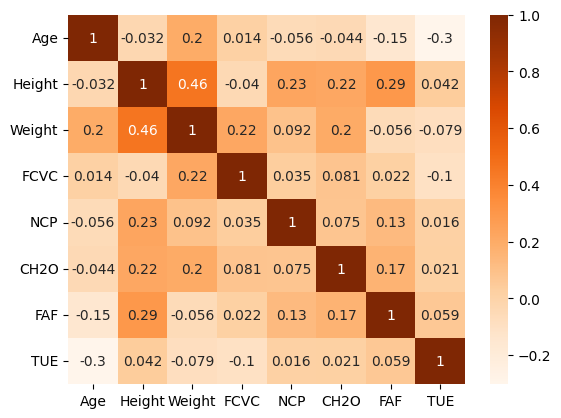

In [ ]:
import seaborn as sns
sns.heatmap(
    data.corr(), annot=True, cmap="Oranges"
)  # Heatmap showing correlation between the attributes

In [ ]:
X = data.iloc[:,:-1]
y = data.iloc[:, -1]
y = pd.DataFrame(y, columns=['NObeyesdad'])

In [ ]:
labels = ['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II', 'Obesity_Type_III']

# Create a dictionary to map labels to numbers starting from 1
label_to_number = {label: i + 1 for i, label in enumerate(labels)}

# Map the condition labels to numeric values
y['NObeyesdad'] = y['NObeyesdad'].map(label_to_number)
y.head()

,NObeyesdad
0,1
1,1
2,1
3,2
4,3


In [ ]:
# Custom function for binary encoding
def binary_encode(df1, columns):
    obesity = df1.copy() #ensure that the function is safe and does not modify the DataFrame passed to it unexpectedly.
    label_encoder = LabelEncoder()
    for col in columns:
        obesity[col] = label_encoder.fit_transform(obesity[col])
    return obesity

In [ ]:
!pip install category_encoders

import category_encoders as ce
# Columns for binary encoding, one-hot encoding, and category encoding
binary_columns = ['Gender', 'FAVC', 'SMOKE', 'SCC', 'family_history_with_overweight']
onehot_encoded_columns = ['CALC', 'MTRANS']
category_encoded_columns = ['CAEC']

# Creating a pipeline for binary encoding
binary_pipeline = Pipeline(steps=[
    ('binary_encode', FunctionTransformer(binary_encode, kw_args={'columns': binary_columns}))
])

# Creating a pipeline for category encoding
category_pipeline = Pipeline(steps=[
    ('category_encode', ce.OrdinalEncoder(cols=category_encoded_columns))
])

# Creating the ColumnTransformer
categorical_transformer = ColumnTransformer(
    transformers=[
        ('binary', binary_pipeline, binary_columns),
        ('onehot', OneHotEncoder(), onehot_encoded_columns),
        ('category', category_pipeline, category_encoded_columns)
    ],
    remainder='passthrough'  # leave the rest of the columns unchanged
)

# Applying the ColumnTransformer to the DataFrame
X_categorical_transformed = categorical_transformer.fit_transform(X)

# Getting new column names
binary_encoded_names = binary_columns  # Binary encoded columns names remain the same
onehot_encoded_names = categorical_transformer.named_transformers_['onehot'].get_feature_names_out(onehot_encoded_columns)
category_encoded_names = categorical_transformer.named_transformers_['category'].get_feature_names_out(category_encoded_columns)

new_columns = binary_encoded_names + list(onehot_encoded_names) + list(category_encoded_names)
new_columns += [col for col in X.columns if col not in binary_columns + onehot_encoded_columns + category_encoded_columns]

# Creating the new DataFrame with the new column names
obesity_encoded_obesity = pd.DataFrame(X_categorical_transformed, columns=new_columns)

obesity_encoded_obesity.head()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.7 MB/s eta 0:00:00


,Gender,FAVC,SMOKE,SCC,family_history_with_overweight,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,CAEC,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0
1,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0


In [ ]:
import pandas as pd

# Concatenate the two DataFrames along the axis=1 (columns)
combined_df = pd.concat([obesity_encoded_obesity, y['NObeyesdad']], axis=1)

print(combined_df.head())  # View the combined DataFrame


   Gender  FAVC  SMOKE  SCC  family_history_with_overweight  CALC_Always  \
0     0.0   0.0    0.0  0.0                             1.0          0.0   
1     0.0   0.0    1.0  1.0                             1.0          0.0   
2     1.0   0.0    0.0  0.0                             1.0          0.0   
3     1.0   0.0    0.0  0.0                             0.0          0.0   
4     1.0   0.0    0.0  0.0                             0.0          0.0   

   CALC_Frequently  CALC_Sometimes  CALC_no  MTRANS_Automobile  MTRANS_Bike  \
0              0.0             0.0      1.0                0.0          0.0   
1              0.0             1.0      0.0                0.0          0.0   
2              1.0             0.0      0.0                0.0          0.0   
3              1.0             0.0      0.0                0.0          0.0   
4              0.0             1.0      0.0                0.0          0.0   

   MTRANS_Motorbike  MTRANS_Public_Transportation  MTRANS_Walking  C

In [ ]:
combined_df.describe()

,Gender,FAVC,SMOKE,SCC,family_history_with_overweight,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,CAEC,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad
count,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000
mean,0.504073,0.883565,0.021083,0.045999,0.825108,0.000479,0.033541,0.661236,0.304744,0.218495,0.003354,0.005271,0.746526,0.026354,1.217058,24.353090,1.702674,86.858730,2.421466,2.701179,2.004749,1.012812,0.663035,4.069478
std,0.500103,0.320823,0.143695,0.209533,0.379966,0.021890,0.180088,0.473403,0.460409,0.413324,0.057831,0.072426,0.435104,0.160223,0.572070,6.368801,0.093186,26.190847,0.534737,0.764614,0.608284,0.853475,0.608153,1.993870
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.915937,1.630178,66.000000,2.000000,2.697467,1.590922,0.124505,0.000000,2.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,22.847618,1.701584,83.101100,2.396265,3.000000,2.000000,1.000000,0.630866,4.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,26.000000,1.769491,108.015907,3.000000,3.000000,2.466193,1.678102,1.000000,6.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000,7.000000


In [ ]:
# Checking for any missing values
null_values = combined_df.isnull().sum()

# Checking for duplicate values
duplicate_values = combined_df.duplicated().sum()

print(f"Number of null values in the dataframe is: \n {null_values}")
print(f"Number of duplicate values in the dataframe is: {duplicate_values}")

Number of null values in the dataframe is: 
 Gender                            24
FAVC                              24
SMOKE                             24
SCC                               24
family_history_with_overweight    24
CALC_Always                       24
CALC_Frequently                   24
CALC_Sometimes                    24
CALC_no                           24
MTRANS_Automobile                 24
MTRANS_Bike                       24
MTRANS_Motorbike                  24
MTRANS_Public_Transportation      24
MTRANS_Walking                    24
CAEC                              24
Age                               24
Height                            24
Weight                            24
FCVC                              24
NCP                               24
CH2O                              24
FAF                               24
TUE                               24
NObeyesdad                        24
dtype: int64
Number of duplicate values in the dataframe is: 23


In [ ]:
# Dropping the duplicated values
clean_df = combined_df.drop_duplicates()

clean_df.duplicated().sum()

# Dropping null values as well

clean_df = combined_df.dropna(axis=0, how="any")

print(clean_df.isnull().sum())


Gender                            0
FAVC                              0
SMOKE                             0
SCC                               0
family_history_with_overweight    0
CALC_Always                       0
CALC_Frequently                   0
CALC_Sometimes                    0
CALC_no                           0
MTRANS_Automobile                 0
MTRANS_Bike                       0
MTRANS_Motorbike                  0
MTRANS_Public_Transportation      0
MTRANS_Walking                    0
CAEC                              0
Age                               0
Height                            0
Weight                            0
FCVC                              0
NCP                               0
CH2O                              0
FAF                               0
TUE                               0
NObeyesdad                        0
dtype: int64


In [ ]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2063 entries, 0 to 2086
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2063 non-null   float64
 1   FAVC                            2063 non-null   float64
 2   SMOKE                           2063 non-null   float64
 3   SCC                             2063 non-null   float64
 4   family_history_with_overweight  2063 non-null   float64
 5   CALC_Always                     2063 non-null   float64
 6   CALC_Frequently                 2063 non-null   float64
 7   CALC_Sometimes                  2063 non-null   float64
 8   CALC_no                         2063 non-null   float64
 9   MTRANS_Automobile               2063 non-null   float64
 10  MTRANS_Bike                     2063 non-null   float64
 11  MTRANS_Motorbike                2063 non-null   float64
 12  MTRANS_Public_Transportation    20

In [ ]:
clean_df.describe()

,Gender,FAVC,SMOKE,SCC,family_history_with_overweight,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,CAEC,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad
count,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000
mean,0.504120,0.883665,0.020843,0.046049,0.825497,0.000485,0.033446,0.660688,0.305381,0.220553,0.003393,0.005332,0.744547,0.026175,1.217159,24.376608,1.702757,87.021810,2.420824,2.702515,2.004374,1.008472,0.661562,4.035385
std,0.500104,0.320704,0.142895,0.209643,0.379634,0.022017,0.179843,0.473591,0.460680,0.414720,0.058166,0.072844,0.436221,0.159696,0.571177,6.383955,0.093277,26.225017,0.534600,0.762620,0.608670,0.849815,0.607007,1.980068
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.926148,1.630178,66.000000,2.000000,2.697467,1.584812,0.119904,0.000000,2.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,22.867719,1.701413,83.325800,2.393837,3.000000,2.000000,1.000000,0.630866,4.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,26.000000,1.769966,108.180369,3.000000,3.000000,2.470251,1.671499,1.000000,6.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000,7.000000


# Importing H2O
Import the h2o Python module and H2OAutoML class and initialize a local H2O cluster.


In [ ]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.2/265.2 MB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.3-py2.py3-none-any.whl size=265293968 sha256=d7437c9df5edee96c143a76b38f5d44704474c342bacac2cf1be9b948dd8a063
  Stored in directory: /root/.cache/pip/wheels/77/9a/1c/2da26f943fd46b57f3c20b54847b936b9152b831dc7447cf71
Successfully built h2o


In [ ]:
import glob, re
import numpy as np
import pandas as pd
from sklearn import *
from datetime import datetime
from xgboost import XGBRegressor
import h2o
from h2o.automl import H2OAutoML
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.model_selection import  train_test_split
from sklearn import metrics
from sklearn.model_selection import KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Installing H20

In [ ]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpyiwebhz5
  JVM stdout: /tmp/tmpyiwebhz5/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpyiwebhz5/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 30 days
H2O_cluster_name:,H2O_from_python_unknownUser_rheo62
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
pdf = clean_df.copy() #Giving pdf the copy of clean_df
pdf

,Gender,FAVC,SMOKE,SCC,family_history_with_overweight,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,CAEC,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000,1.0
1,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000,1.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000,2.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2082,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247,7.0
2083,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270,7.0
2084,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288,7.0
2085,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035,7.0


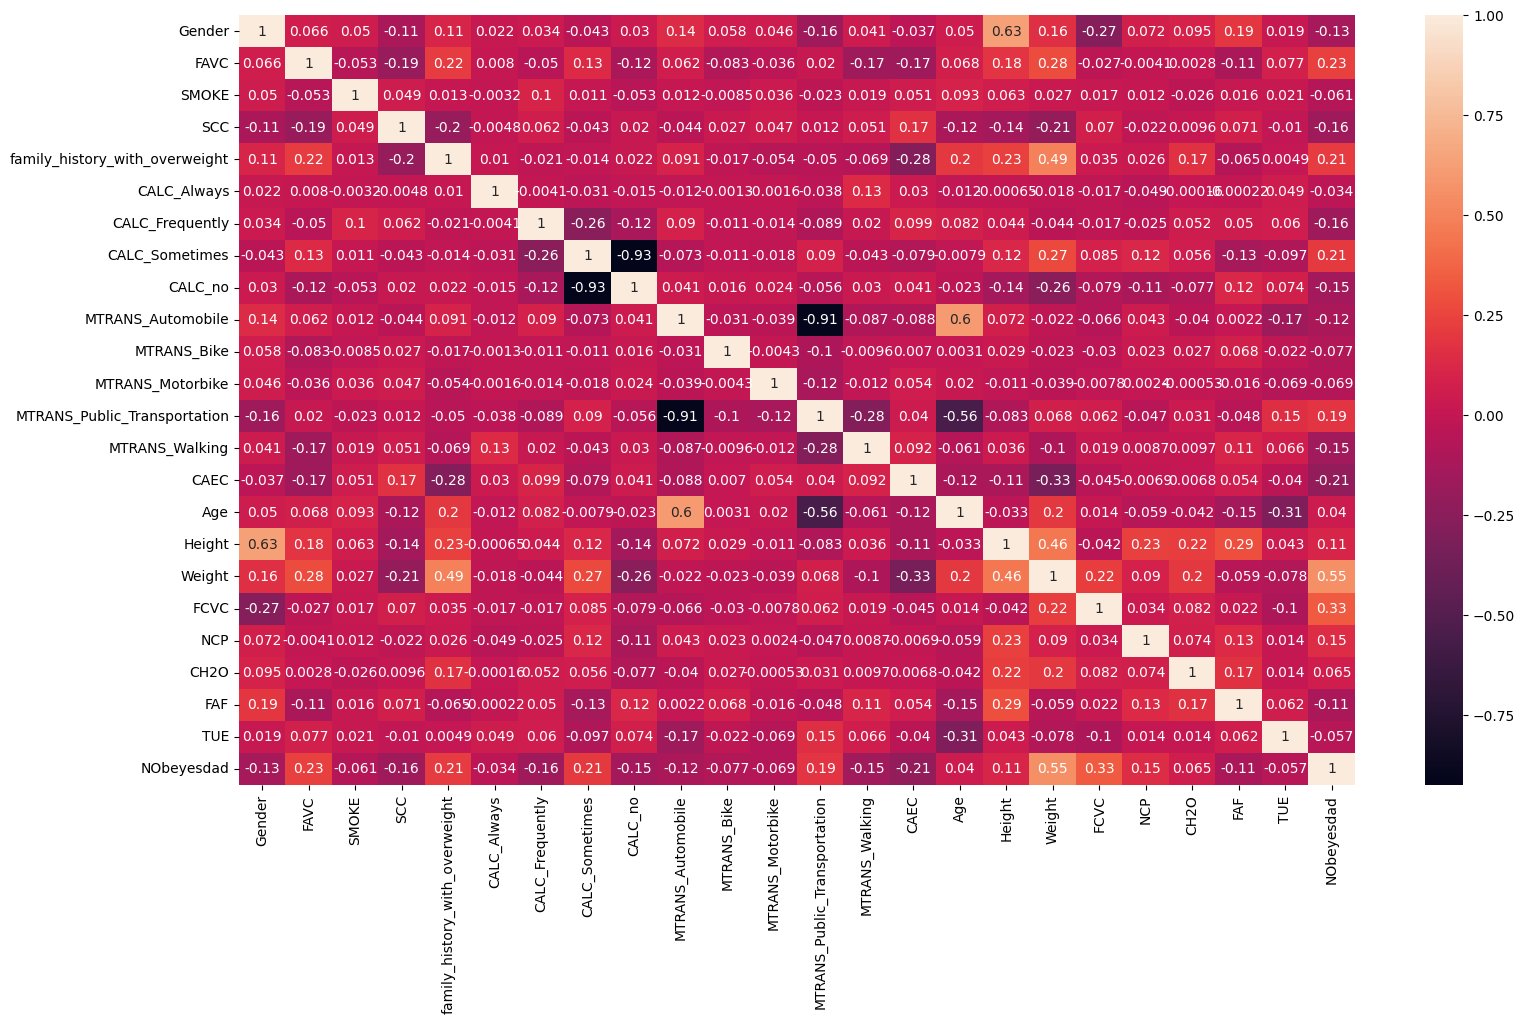

In [ ]:
import seaborn as sns
plt.figure(figsize=(18, 10))  # Increase the figure size
sns.heatmap(pdf.corr(), annot=True)
plt.show()
# Checking the co-relation again as the dataframe changed. Categorical values are changed to numerical


Tried casting pandas dataframe to h2o dataframe but since that is not working, I am forced to convert the pandas df to a file and then read it using h2o.

In [ ]:
# import h2o

# hdf = h2o.H2OFrame.from_pandas(pdf)

# # Now you can use hdf for further analysis or modeling
# hdf.types

AttributeError: type object 'H2OFrame' has no attribute 'from_pandas'

In [ ]:
# Casting df to csv
import pandas as pd
pdf.to_csv("obesity_numerical_data.csv", index=False)  # Don't save the index


In [ ]:
#Importing our dataset with H2O.
hdf = h2o.import_file('/content/obesity_numerical_data.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
hdf.types

{'Gender': 'int',
 'FAVC': 'int',
 'SMOKE': 'int',
 'SCC': 'int',
 'family_history_with_overweight': 'int',
 'CALC_Always': 'int',
 'CALC_Frequently': 'int',
 'CALC_Sometimes': 'int',
 'CALC_no': 'int',
 'MTRANS_Automobile': 'int',
 'MTRANS_Bike': 'int',
 'MTRANS_Motorbike': 'int',
 'MTRANS_Public_Transportation': 'int',
 'MTRANS_Walking': 'int',
 'CAEC': 'int',
 'Age': 'real',
 'Height': 'real',
 'Weight': 'real',
 'FCVC': 'real',
 'NCP': 'real',
 'CH2O': 'real',
 'FAF': 'real',
 'TUE': 'real',
 'NObeyesdad': 'int'}

In [ ]:
hdf.describe()

Rows:2063
Cols:24

,Gender,FAVC,SMOKE,SCC,family_history_with_overweight,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,CAEC,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad
type,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,real,real,real,real,real,real,real,real,int
mins,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,14.0,1.45,39.0,1.0,1.0,1.0,0.0,0.0,1.0
mean,0.5041202132816287,0.883664566165778,0.02084343189529811,0.046049442559379546,0.825496849248667,0.0004847309743092584,0.033446437227338824,0.6606883179835191,0.3053805138148328,0.22055259331071256,0.0033931168201648087,0.0053320407174018425,0.7445467765390208,0.02617547261269995,1.2171594764905478,24.376607882695097,1.702757254483762,87.02181046776538,2.420823681047019,2.7025153431895297,2.0043740353853607,1.0084722481822592,0.6615624066892872,4.035385361124576
maxs,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,61.0,1.98,173.0,3.0,4.0,3.0,3.0,2.0,7.0
sigma,0.5001042462554661,0.32070446817402326,0.14289464967646665,0.2096430190118363,0.379633588296033,0.02201660678463551,0.17984285066863667,0.47359052333903284,0.46068007138892564,0.41471980540476827,0.05816565602954759,0.0728435455618654,0.4362214037751624,0.15969558285917132,0.5711766381387607,6.383955480253617,0.09327742445287222,26.22501697729513,0.5345998770313387,0.7626196480615817,0.6086703657867777,0.8498148526605772,0.6070065604005556,1.980067608580062
zeros,1023,240,2020,1968,360,2062,1994,700,1433,1608,2056,2052,527,2009,0,0,0,0,0,0,0,401,530,0
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,1.0
1,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,23.0,1.8,77.0,2.0,3.0,2.0,2.0,1.0,1.0


**Identifing predictor significance**

In [ ]:
hdf.columns

['Gender',
 'FAVC',
 'SMOKE',
 'SCC',
 'family_history_with_overweight',
 'CALC_Always',
 'CALC_Frequently',
 'CALC_Sometimes',
 'CALC_no',
 'MTRANS_Automobile',
 'MTRANS_Bike',
 'MTRANS_Motorbike',
 'MTRANS_Public_Transportation',
 'MTRANS_Walking',
 'CAEC',
 'Age',
 'Height',
 'Weight',
 'FCVC',
 'NCP',
 'CH2O',
 'FAF',
 'TUE',
 'NObeyesdad']

In [ ]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(pdf['NObeyesdad'], pdf[['Gender',
 'FAVC',
 'SMOKE',
 'SCC',
 'family_history_with_overweight',
 'CALC_Always',
 'CALC_Frequently',
 'CALC_Sometimes',
 'CALC_no',
 'MTRANS_Automobile',
 'MTRANS_Bike',
 'MTRANS_Motorbike',
 'MTRANS_Public_Transportation',
 'MTRANS_Walking',
 'CAEC',
 'Age',
 'Height',
 'Weight',
 'FCVC',
 'NCP',
 'CH2O',
 'FAF',
 'TUE']]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             NObeyesdad   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     77.77
Date:                Mon, 19 Feb 2024   Prob (F-statistic):          4.57e-242
Time:                        23:38:56   Log-Likelihood:                -3729.7
No. Observations:                2063   AIC:                             7503.
Df Residuals:                    2041   BIC:                             7627.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Gender                            -0.4086      0.091     -4.483      0.000      -0.587      -0.230
FAVC                               0.4949      0.112      4.428      0.000       0.276       0.714
SMOKE                             -0.6303      0.234     -2.694      0.007      -1.089      -0.171
SCC                               -0.5577      0.165     -3.381      0.001      -0.881      -0.234
family_history_with_overweight    -0.3665      0.104     -3.514      0.000      -0.571      -0.162
CALC_Always                        0.0780      1.421      0.055      0.956      -2.709       2.865
CALC_Frequently                   -0.8352      0.578     -1.446      0.148      -1.968       0.297
CALC_Sometimes                     0.2603      0.545      0.478      0.633      -0.808       1.329
CALC_no                            0.3513      0.537      0.654      0.513      -0.702       1.405
MTRANS_Automobile                  0.4603      0.466      0.988      0.324      -0.454       1.374
MTRANS_Bike                       -0.8463      0.666     -1.270      0.204      -2.153       0.460
MTRANS_Motorbike                  -0.3975      0.592     -0.672      0.502      -1.558       0.762
MTRANS_Public_Transportation       0.8278      0.440      1.881      0.060      -0.035       1.691
MTRANS_Walking                    -0.1899      0.478     -0.397      0.691      -1.127       0.748
CAEC                              -0.0540      0.063     -0.860      0.390      -0.177       0.069
Age                               -0.0036      0.007     -0.490      0.624      -0.018       0.011
Height                            -1.4604      0.565     -2.585      0.010      -2.568      -0.352
Weight                             0.0406      0.002     21.685      0.000       0.037       0.044
FCVC                               0.6793      0.068     10.049      0.000       0.547       0.812
NCP                                0.3271      0.045      7.297      0.000       0.239       0.415
CH2O                              -0.0715      0.057     -1.256      0.209      -0.183       0.040
FAF                               -0.0768      0.043     -1.786      0.074      -0.161       0.008
TUE                               -0.0238      0.058     -0.408      0.683      -0.138       0.091
==============================================================================
Omnibus:                       11.697   Durbin-Watson:                   0.697
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.342
Skew:                          -0.146   Prob(JB):                      0.00209
Kurtosis:                       3.241   Cond. No.                     1.04e+17
==============================================================================

Notes:
[1] Standard Errors assume 

**VIF (Multicollinearity)**

In [ ]:
df = pdf[['Gender','FAVC','SMOKE','SCC','family_history_with_overweight','CALC_Always','CALC_Frequently','CALC_Sometimes','CALC_no','MTRANS_Automobile','MTRANS_Bike',
 'MTRANS_Motorbike','MTRANS_Public_Transportation','MTRANS_Walking','CAEC','Age','Height','Weight','FCVC','NCP','CH2O','FAF',
 'TUE']].dropna() #subset the dataframe

In [ ]:
# the independent variables set
X = pdf[['Gender','FAVC','SMOKE','SCC','family_history_with_overweight','CALC_Always','CALC_Frequently','CALC_Sometimes','CALC_no','MTRANS_Automobile','MTRANS_Bike',
 'MTRANS_Motorbike','MTRANS_Public_Transportation','MTRANS_Walking','CAEC','Age','Height','Weight','FCVC','NCP','CH2O','FAF',
 'TUE']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

                           feature       VIF
0                           Gender  1.947439
1                             FAVC  1.204272
2                            SMOKE  1.047503
3                              SCC  1.120484
4   family_history_with_overweight  1.469137
5                      CALC_Always       inf
6                  CALC_Frequently       inf
7                   CALC_Sometimes       inf
8                          CALC_no       inf
9                MTRANS_Automobile       inf
10                     MTRANS_Bike       inf
11                MTRANS_Motorbike       inf
12    MTRANS_Public_Transportation       inf
13                  MTRANS_Walking       inf
14                            CAEC  1.207185
15                             Age  2.040430
16                          Height  2.602399
17                          Weight  2.260368
18                            FCVC  1.223789
19                             NCP  1.095131
20                            CH2O  1.124912
21        

**Regularization**

In [ ]:
X = pdf[['Gender','FAVC','SMOKE','SCC','family_history_with_overweight','CALC_Always','CALC_Frequently','CALC_Sometimes','CALC_no','MTRANS_Automobile','MTRANS_Bike',
 'MTRANS_Motorbike','MTRANS_Public_Transportation','MTRANS_Walking','CAEC','Age','Height','Weight','FCVC','NCP','CH2O','FAF',
 'TUE']]

y = pdf['NObeyesdad']

#Spliting data into Training 70%, Test set 30%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
# Ridge regression with an alpha of 0.5
ridge = Ridge(fit_intercept=True, alpha=0.5)
ridge.fit(X_train, y_train)

Ridge(alpha=0.5)

In [ ]:
# rmse after regularization
y_pred = ridge.predict(X_test)

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse

1.4860728222853548

In [ ]:
print(f"X_train no_of_rows and cols: \n {X_train.shape}")
print(f"X_test no_of_rows and cols: \n {X_test.shape}")



X_train no_of_rows and cols: 
 (1444, 23)
X_test no_of_rows and cols: 
 (619, 23)


In [ ]:
hdf.head()

Gender,FAVC,SMOKE,SCC,family_history_with_overweight,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,CAEC,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad
0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,21,1.62,64,2,3,2,0,1,1
0,0,1,1,1,0,0,1,0,0,0,0,1,0,1,21,1.52,56,3,3,3,3,0,1
1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,23,1.8,77,2,3,2,2,1,1
1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,27,1.8,87,3,3,2,2,0,2
1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,22,1.78,89.8,2,1,2,0,0,3
1,1,0,0,0,0,0,1,0,1,0,0,0,0,1,29,1.62,53,2,3,2,0,0,1
0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,23,1.5,55,3,3,2,1,0,1
1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,22,1.64,53,2,3,2,3,0,1
1,1,0,0,1,0,1,0,0,0,0,0,1,0,1,24,1.78,64,3,3,2,1,1,1
1,1,0,0,1,0,0,0,1,0,0,0,1,0,1,22,1.72,68,2,3,2,1,1,1


In [ ]:
pct_rows = 0.80  # Setting up the data split between training and test dataset.
hdf_train, hdf_test = hdf.split_frame([pct_rows])

In [ ]:
print(hdf_train.shape)
print(hdf_test.shape)

(1668, 24)
(395, 24)


In [ ]:
X = hdf.columns
print(X)

['Gender', 'FAVC', 'SMOKE', 'SCC', 'family_history_with_overweight', 'CALC_Always', 'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking', 'CAEC', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'NObeyesdad']


In [ ]:
#Removing target variable from dataset. to create input varaibles and output (or) target variable.
y = "NObeyesdad"
X = hdf.columns
X.remove(y)

In [ ]:
print(X)
print()
print(y)

['Gender', 'FAVC', 'SMOKE', 'SCC', 'family_history_with_overweight', 'CALC_Always', 'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking', 'CAEC', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

NObeyesdad


In [ ]:
run_time = 222
aml1 = H2OAutoML(max_runtime_secs=run_time, seed=1)


In [ ]:
aml1.train(x=X, y=y, training_frame=hdf_train)  # Training the dataset on different models

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),11/59
# GBM base models (used / total),7/23
# XGBoost base models (used / total),3/30
# DRF base models (used / total),1/2
# GLM base models (used / total),0/1
# DeepLearning base models (used / total),0/3
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


In [ ]:
print(
    aml1.leaderboard
)  # Leaderboard showing the performance of different models on the dataset.

model_id                                                    rmse       mse       mae     rmsle    mean_residual_deviance
StackedEnsemble_AllModels_3_AutoML_2_20240220_05259     0.992353  0.984764  0.62215   0.266884                  0.984764
StackedEnsemble_AllModels_2_AutoML_2_20240220_05259     0.993336  0.986716  0.62561   0.267825                  0.986716
StackedEnsemble_BestOfFamily_3_AutoML_2_20240220_05259  0.994288  0.988608  0.622879  0.268576                  0.988608
StackedEnsemble_BestOfFamily_4_AutoML_2_20240220_05259  0.99591   0.991837  0.625265  0.269262                  0.991837
StackedEnsemble_AllModels_1_AutoML_2_20240220_05259     0.997202  0.994411  0.62983   0.268763                  0.994411
StackedEnsemble_BestOfFamily_2_AutoML_2_20240220_05259  0.999324  0.998649  0.628222  0.269853                  0.998649
GBM_4_AutoML_2_20240220_05259                           1.00374   1.00749   0.640218  0.271063                  1.00749
GBM_3_AutoML_2_20240220_05259    

In [ ]:
model_index = 0
glm_index = 0
glm_model = ""
aml_leaderboard_df = aml1.leaderboard.as_data_frame()
models_dict = {}
for m in aml_leaderboard_df["model_id"]:
    models_dict[m] = model_index
    if "StackedEnsemble" not in m:
        break
    model_index = model_index + 1

for m in aml_leaderboard_df["model_id"]:
    if "GLM" in m:
        models_dict[m] = glm_index
        break
    glm_index = glm_index + 1
models_dict

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


{'StackedEnsemble_AllModels_3_AutoML_2_20240220_05259': 0,
 'StackedEnsemble_AllModels_2_AutoML_2_20240220_05259': 1,
 'StackedEnsemble_BestOfFamily_3_AutoML_2_20240220_05259': 2,
 'StackedEnsemble_BestOfFamily_4_AutoML_2_20240220_05259': 3,
 'StackedEnsemble_AllModels_1_AutoML_2_20240220_05259': 4,
 'StackedEnsemble_BestOfFamily_2_AutoML_2_20240220_05259': 5,
 'GBM_4_AutoML_2_20240220_05259': 6,
 'GLM_1_AutoML_2_20240220_05259': 60}

In [ ]:
print(model_index)
best_model = h2o.get_model(aml1.leaderboard[model_index, "model_id"])

6


In [ ]:
best_model.algo

'gbm'

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
import matplotlib.cbook

warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

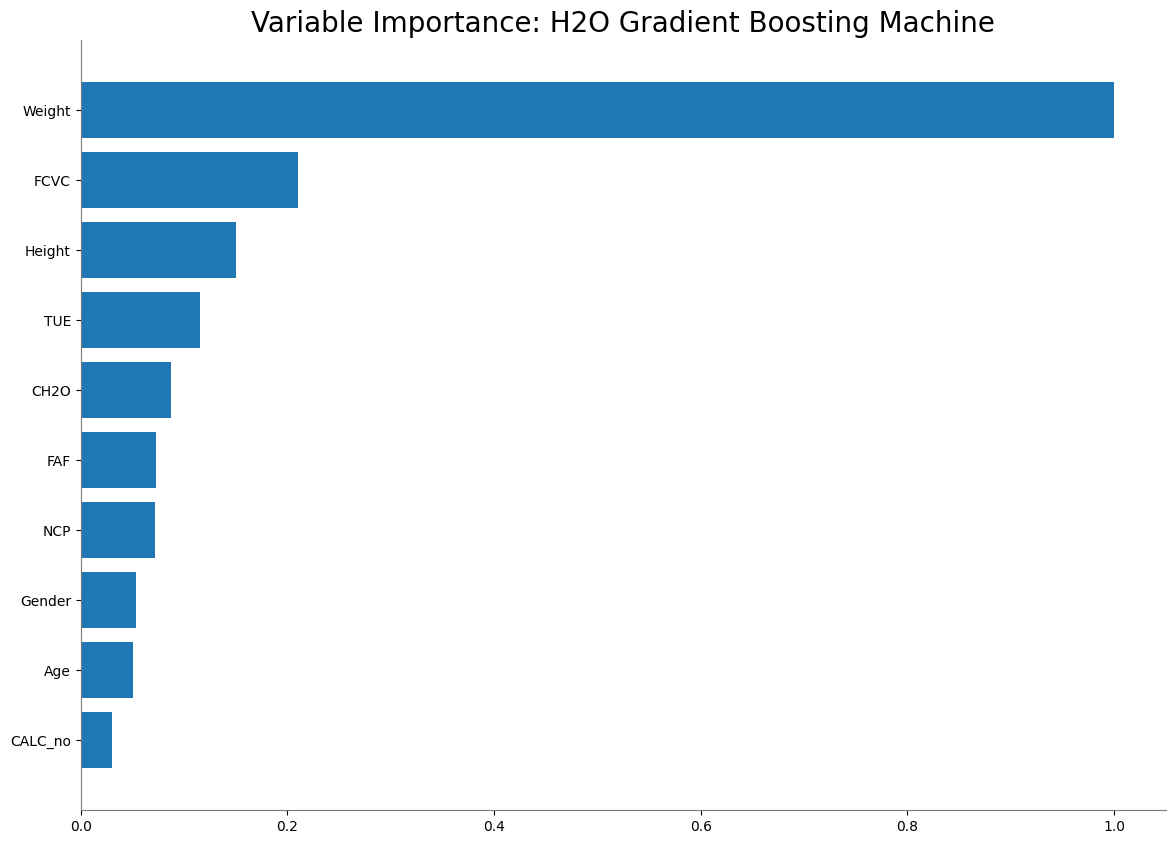

<Figure size 640x480 with 0 Axes>

In [ ]:
if best_model.algo in [
    "gbm",
    "drf",
    "xrt",
    "xgboost",
]:  # Importance of all the variables in GBM algorithm.
    best_model.varimp_plot()

60
glm


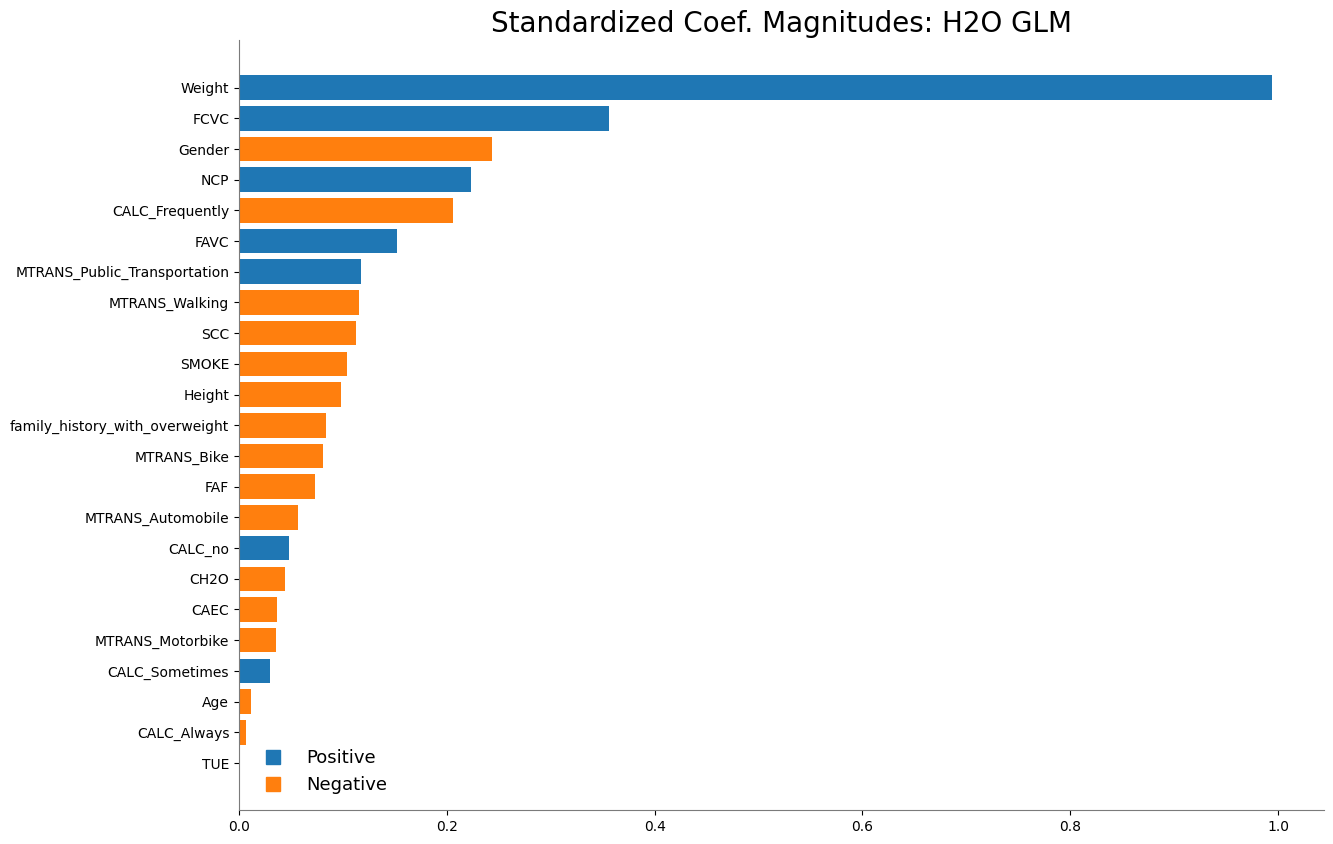

In [ ]:
if glm_index is not 0:
    print(glm_index)
    glm_model = h2o.get_model(aml1.leaderboard[glm_index, "model_id"])
    print(glm_model.algo)
    glm_model.std_coef_plot()

In [ ]:
print(best_model.rmse(train=True))

0.5828694422432368


In [ ]:
def model_performance_stats(perf):
    d = {}
    try:
        d["mse"] = perf.mse()
    except:
        pass
    try:
        d["rmse"] = perf.rmse()
    except:
        pass
    try:
        d["null_degrees_of_freedom"] = perf.null_degrees_of_freedom()
    except:
        pass
    try:
        d["residual_degrees_of_freedom"] = perf.residual_degrees_of_freedom()
    except:
        pass
    try:
        d["residual_deviance"] = perf.residual_deviance()
    except:
        pass
    try:
        d["null_deviance"] = perf.null_deviance()
    except:
        pass
    try:
        d["aic"] = perf.aic()
    except:
        pass
    try:
        d["logloss"] = perf.logloss()
    except:
        pass
    try:
        d["auc"] = perf.auc()
    except:
        pass
    try:
        d["gini"] = perf.gini()
    except:
        pass
    return d

In [ ]:
mod_perf = best_model.model_performance(hdf_test)
stats_test = {}
stats_test = model_performance_stats(mod_perf)
stats_test

{'mse': 0.8335631835818647,
 'rmse': 0.912996814661401,
 'null_degrees_of_freedom': None,
 'residual_degrees_of_freedom': None,
 'residual_deviance': None,
 'null_deviance': None}

In [ ]:
predictions = best_model.predict(hdf_test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [ ]:
y_pred = h2o.as_list(
    predictions
)  # Predictions on Test Dataset using the best model from the leaderboard.
print(y_pred)

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
      predict
0    2.126500
1    2.277732
2    2.798777
3    3.128771
4    3.494776
..        ...
390  6.873318
391  6.724819
392  6.533116
393  6.680917
394  6.904900

[395 rows x 1 columns]


In [ ]:
y_test = h2o.as_list(hdf_test[y])  # Real Answers
y_test

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


,NObeyesdad
0,1
1,1
2,1
3,4
4,1
...,...
390,7
391,7
392,7
393,7


In [ ]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

weight_glm = H2OGeneralizedLinearEstimator(
    family="gaussian", lambda_=0, compute_p_values=True, nfolds=5
)  # Elastic Net Regularization
weight_glm_regularization_ridge = H2OGeneralizedLinearEstimator(
    family="gaussian", alpha=0, nfolds=5
)  # RIDGE Regularization
weight_glm_regularization_lasso = H2OGeneralizedLinearEstimator(
    family="gaussian", alpha=1, nfolds=5
)  #LASSO Regularization
weight_glm_regularization_lamba_search = H2OGeneralizedLinearEstimator(
    lambda_search=True
)  # Lambda Search

In [ ]:
weight_glm_regularization_ridge.train(x=X, y=y, training_frame=hdf_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
,gaussian,identity,Ridge ( lambda = 0.00108 ),23,23,1,py_3_sid_a8f8
,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,1.2245454,0.0527316,1.2452439,1.3030236,1.2163649,1.1918577,1.1662371
mean_residual_deviance,2.2763233,0.2513045,2.2758439,2.651909,2.3406398,2.1303277,1.9828961
mse,2.2763233,0.2513045,2.2758439,2.651909,2.3406398,2.1303277,1.9828961
null_deviance,1315.5874,101.35333,1385.3878,1250.3655,1169.6777,1404.7888,1367.7169
r2,0.4170546,0.0933485,0.4350391,0.2956462,0.3522774,0.4742252,0.5280850
residual_deviance,759.29584,85.03417,780.6145,880.4338,756.0266,734.9631,644.4412
rmse,1.5069382,0.0826180,1.5085901,1.6284683,1.529915,1.4595642,1.4081534
rmsle,0.3790185,0.0170905,0.3873969,0.4021578,0.3802524,0.3661673,0.3591178


In [ ]:
weight_glm_regularization_lamba_search.train(x=X, y=y, training_frame=hdf_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1708381623512_47


GLM Model: summary
    family    link      regularization                                 lambda_search                                                                 number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ---------------------------------------------  ----------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Elastic Net (alpha = 0.5, lambda = 0.007409 )  nlambda = 100, lambda.max = 2.1598, lambda.min = 0.007409, lambda.1se = -1.0  23                            20                             62                      py_3_sid_a8f8

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 2.2222657269518122
RMSE: 1.4907265768583493
MAE: 1.2132846488670934
RMSLE: 0.3743228455326936
Mean Residual Deviance: 2.2222657269518122
R^2: 0.4360028238072605
Null degrees of freedom: 1667
Residual degrees of freedom: 1647
Null deviance: 6572.2655875299715
Residual deviance: 3706.7392325556225
AIC: 6109.522438392423

Scoring History: 
     timestamp            duration    iteration    lambda    predictors    deviance_train      alpha    iterations    training_rmse       training_deviance    training_mae        training_r2
---  -------------------  ----------  -----------  --------  ------------  ------------------  -------  ------------  ------------------  -------------------  ------------------  ------------------
     2024-02-20 01:14:03  0.000 sec   1            .22E1     1             3.940207186768566   0.5
     2024-02-20 01:14:03  0.011 sec   2            .2E1      2             3.8380777379290993  0.5
     2024-02-20 01:14:03  0.013 sec   3            .18E1     2             3.7406935853902814  0.5
     2024-02-20 01:14:03  0.019 sec   4            .16E1     2             3.648433871331195   0.5
     2024-02-20 01:14:03  0.020 sec   5            .15E1     2             3.561590534367126   0.5
     2024-02-20 01:14:03  0.022 sec   6            .14E1     2             3.480365968427551   0.5
     2024-02-20 01:14:03  0.027 sec   7            .12E1     2             3.4048737629855235  0.5
     2024-02-20 01:14:03  0.028 sec   8            .11E1     3             3.327314261545179   0.5
     2024-02-20 01:14:03  0.031 sec   9            .1E1      3             3.2389475960116862  0.5
     2024-02-20 01:14:03  0.035 sec   10           .93E0     3             3.1591996589057447  0.5
---  ---                  ---         ---          ---       ---           ---                 ---      ---           ---                 ---                  ---                 ---
     2024-02-20 01:14:04  0.185 sec   53           .17E-1    21            2.2241455038392597  0.5
     2024-02-20 01:14:04  0.191 sec   54           .16E-1    21            2.2237570512038856  0.5
     2024-02-20 01:14:04  0.193 sec   55           .14E-1    21            2.2234332362185705  0.5
     2024-02-20 01:14:04  0.194 sec   56           .13E-1    21            2.223162954379079   0.5
     2024-02-20 01:14:04  0.196 sec   57           .12E-1    21            2.222938074646853   0.5
     2024-02-20 01:14:04  0.197 sec   58           .11E-1    21            2.2227504151171216  0.5
     2024-02-20 01:14:04  0.202 sec   59           .98E-2    21            2.222594179234681   0.5
     2024-02-20 01:14:04  0.295 sec   60           .89E-2    21            2.222464010641966   0.5
     2024-02-20 01:14:04  0.297 sec   61           .81E-2    21            2.222355899784768   0.5
     2024-02-20 01:14:04  0.299 sec   62           .74E-2    21            2.2222657269518025  0.5      62            1.4907265768583493  2.2222657269518122   1.2132846488670934  0.4360028238072605
[62 rows x 13 columns]


Variable Import

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
GBM_grid_1_AutoML_2_20240220_05259_model_12,0.878006,0.770895,0.536169,0.238433,0.770895,395,0.029267,GBM
StackedEnsemble_BestOfFamily_4_AutoML_2_20240220_05259,0.881179,0.776477,0.537575,0.239658,0.776477,181,0.099735,StackedEnsemble
StackedEnsemble_AllModels_3_AutoML_2_20240220_05259,0.884541,0.782413,0.555635,0.237845,0.782413,466,0.440824,StackedEnsemble
StackedEnsemble_AllModels_2_AutoML_2_20240220_05259,0.886383,0.785675,0.549399,0.239542,0.785675,384,0.335686,StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_2_20240220_05259,0.886818,0.786446,0.551103,0.239542,0.786446,276,0.22978,StackedEnsemble
XGBoost_grid_1_AutoML_2_20240220_05259_model_24,0.89021,0.792474,0.554651,0.241804,0.792474,603,0.025913,XGBoost
StackedEnsemble_BestOfFamily_3_AutoML_2_20240220_05259,0.891114,0.794083,0.543893,0.242361,0.794083,186,0.240516,StackedEnsemble
DRF_1_AutoML_2_20240220_05259,0.891315,0.794443,0.553162,0.24583,0.794443,888,0.104766,DRF
StackedEnsemble_BestOfFamily_2_AutoML_2_20240220_05259,0.89249,0.796538,0.544594,0.24281,0.796538,325,0.080647,StackedEnsemble
GBM_3_AutoML_2_20240220_05259,0.896207,0.803187,0.593143,0.240531,0.803187,395,0.036323,GBM


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

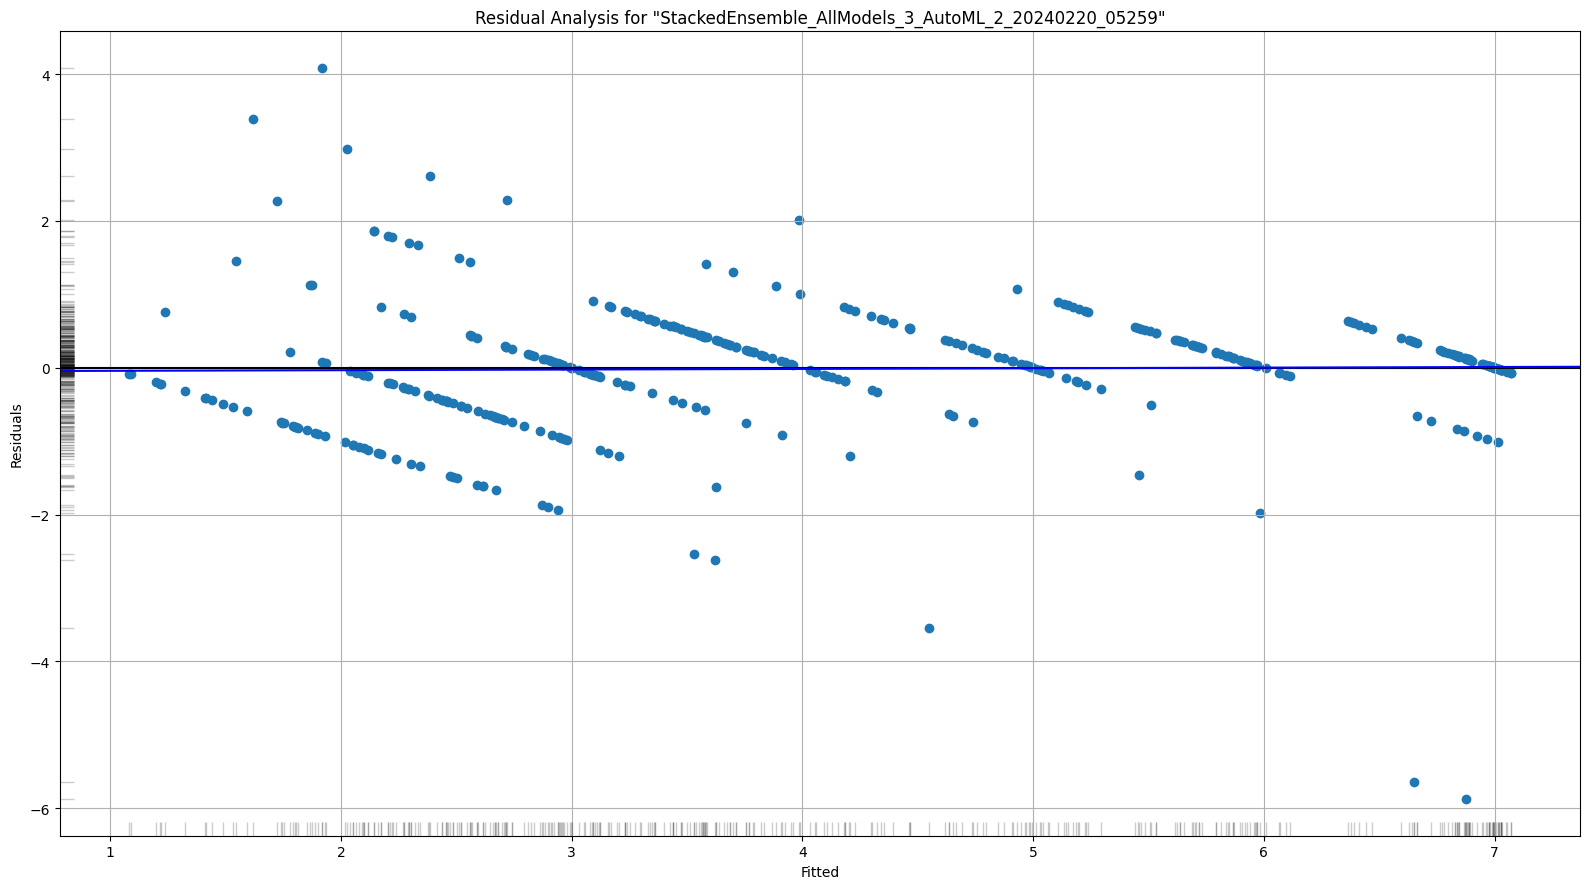

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

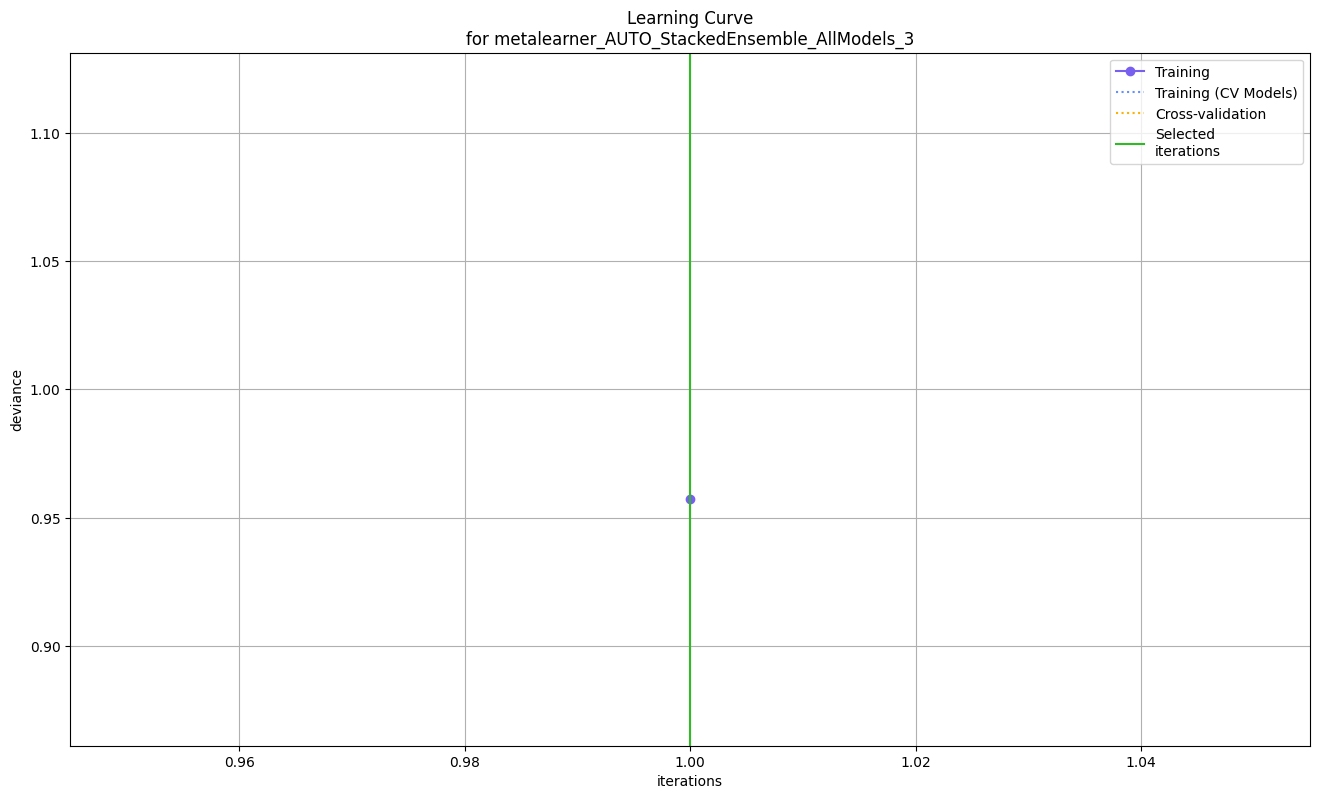

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

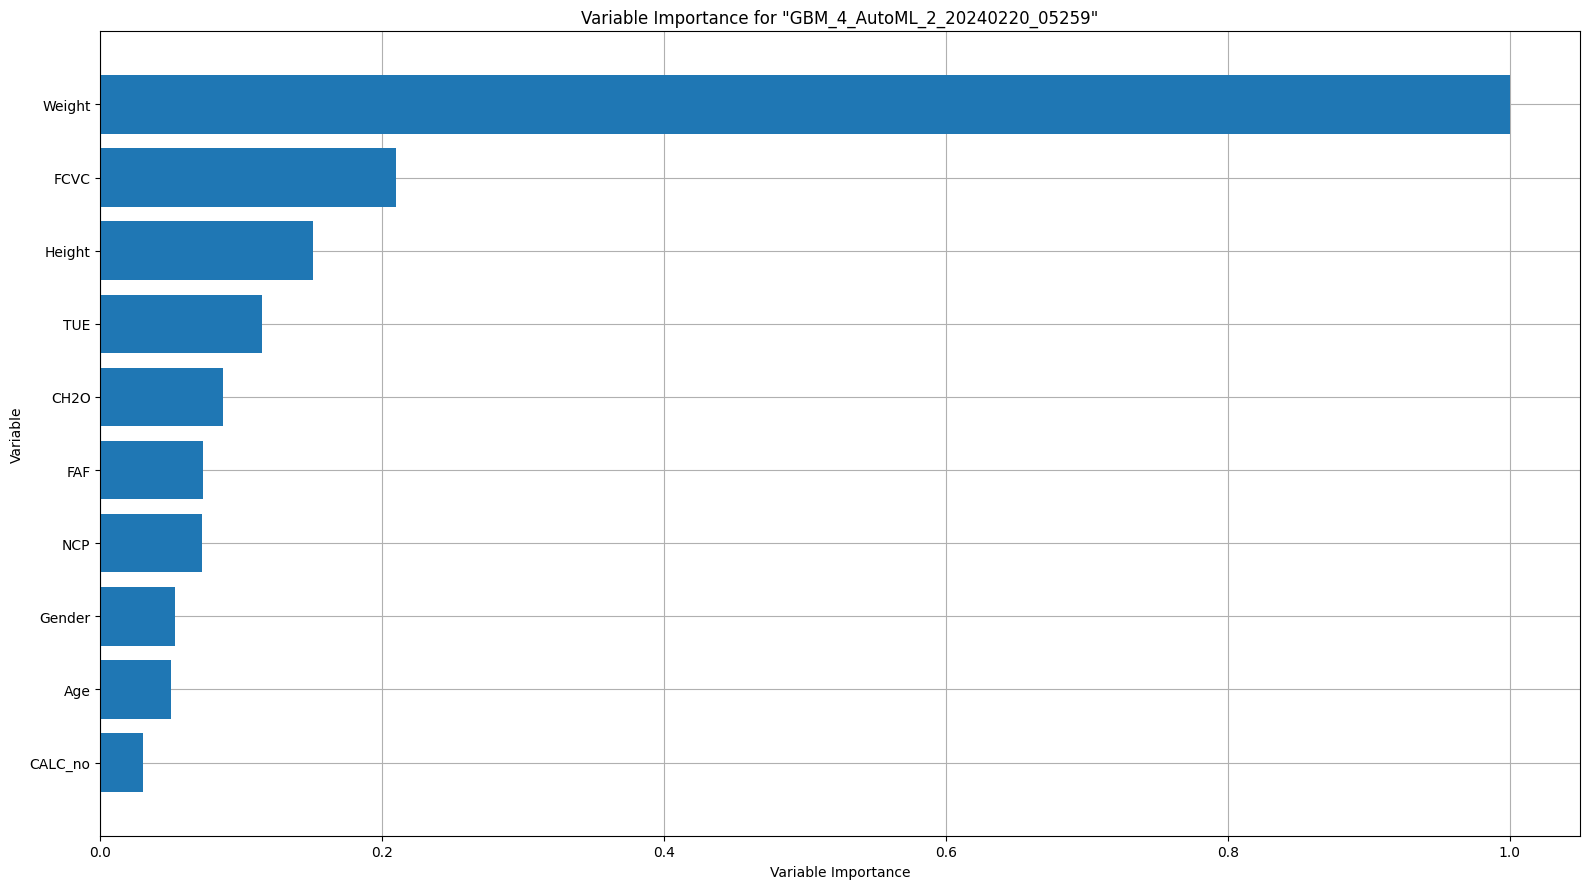

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

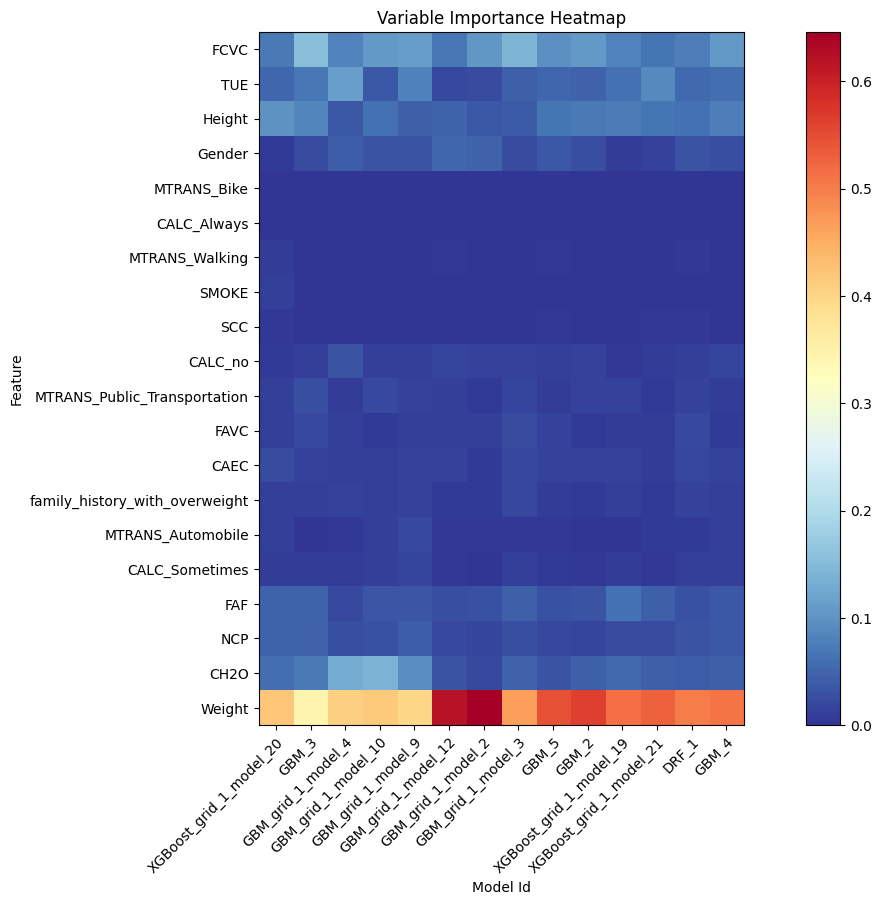

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

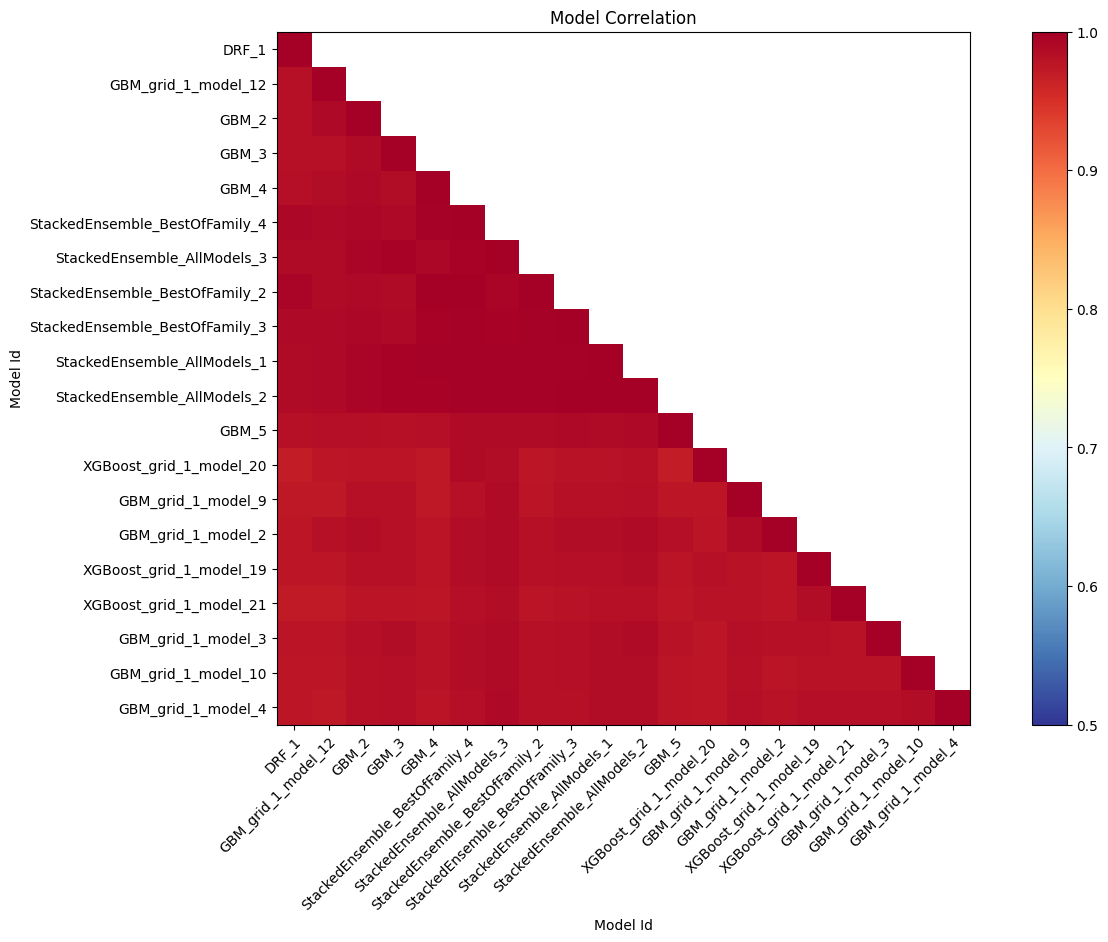

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

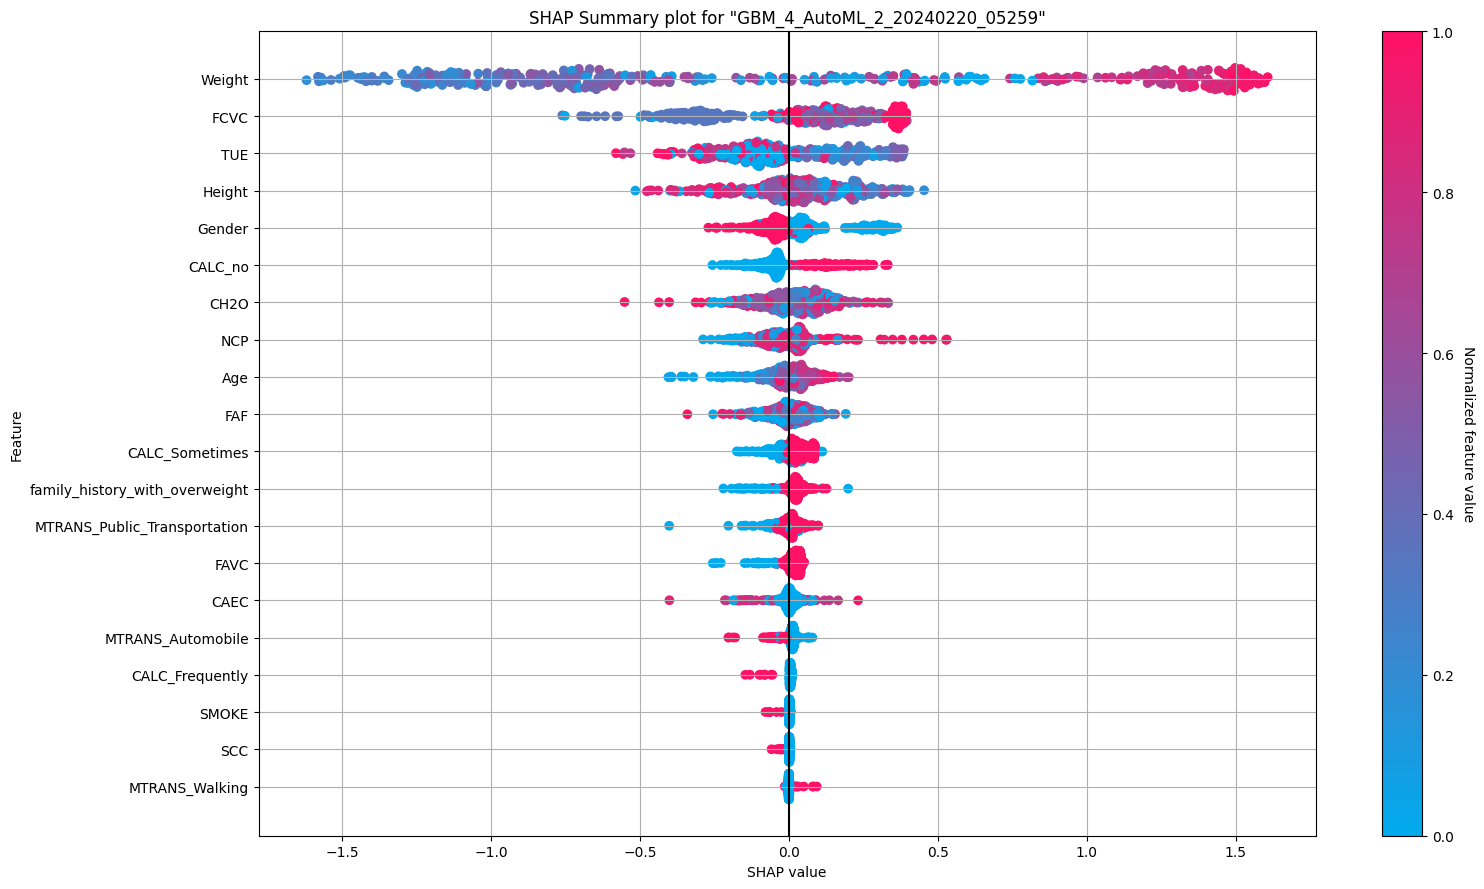

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

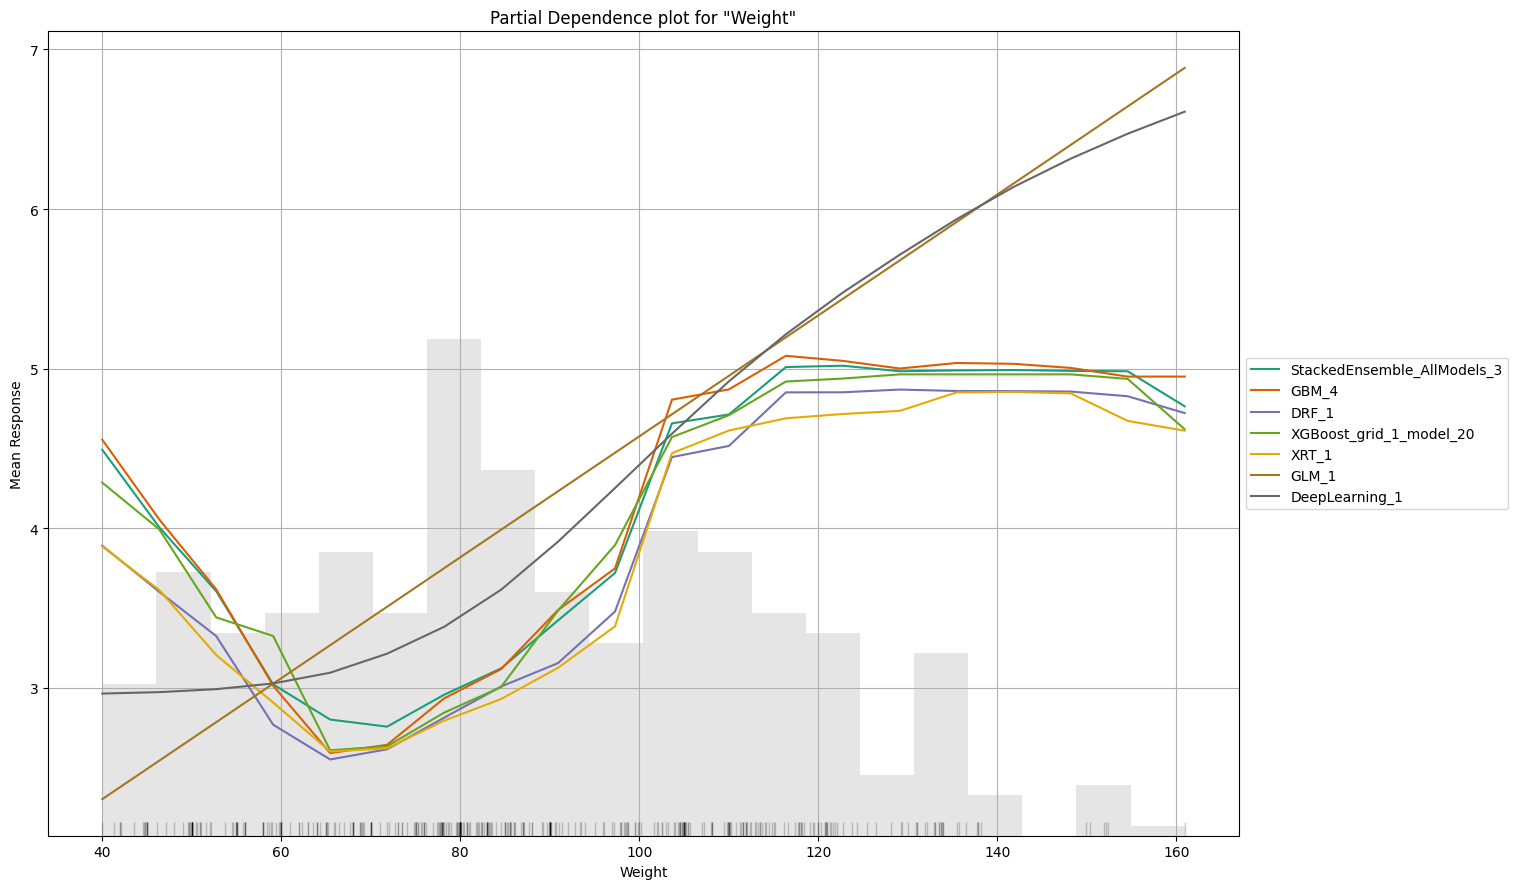

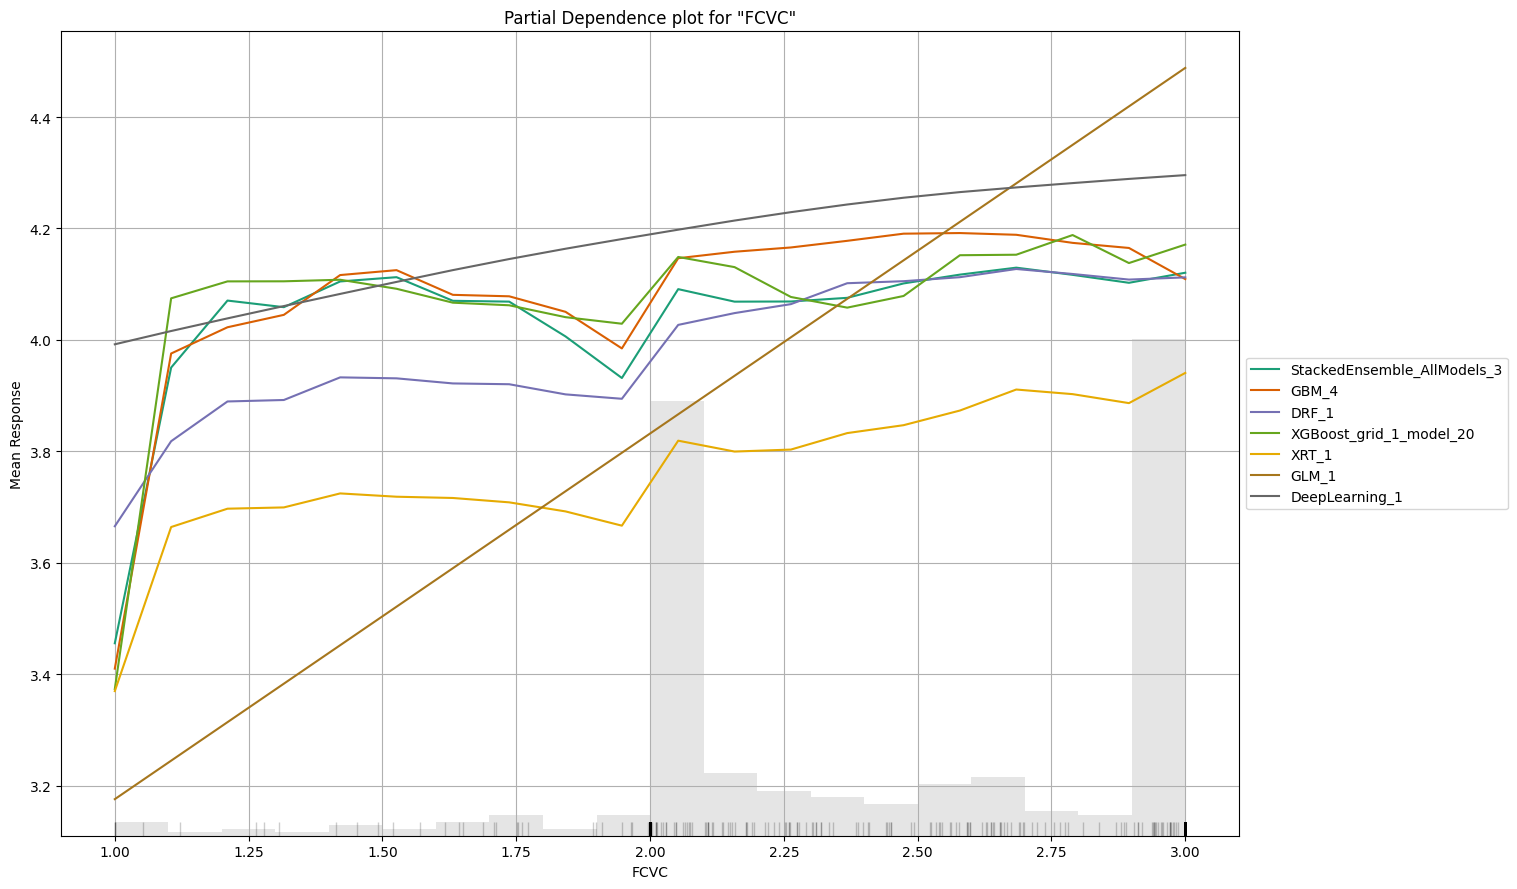

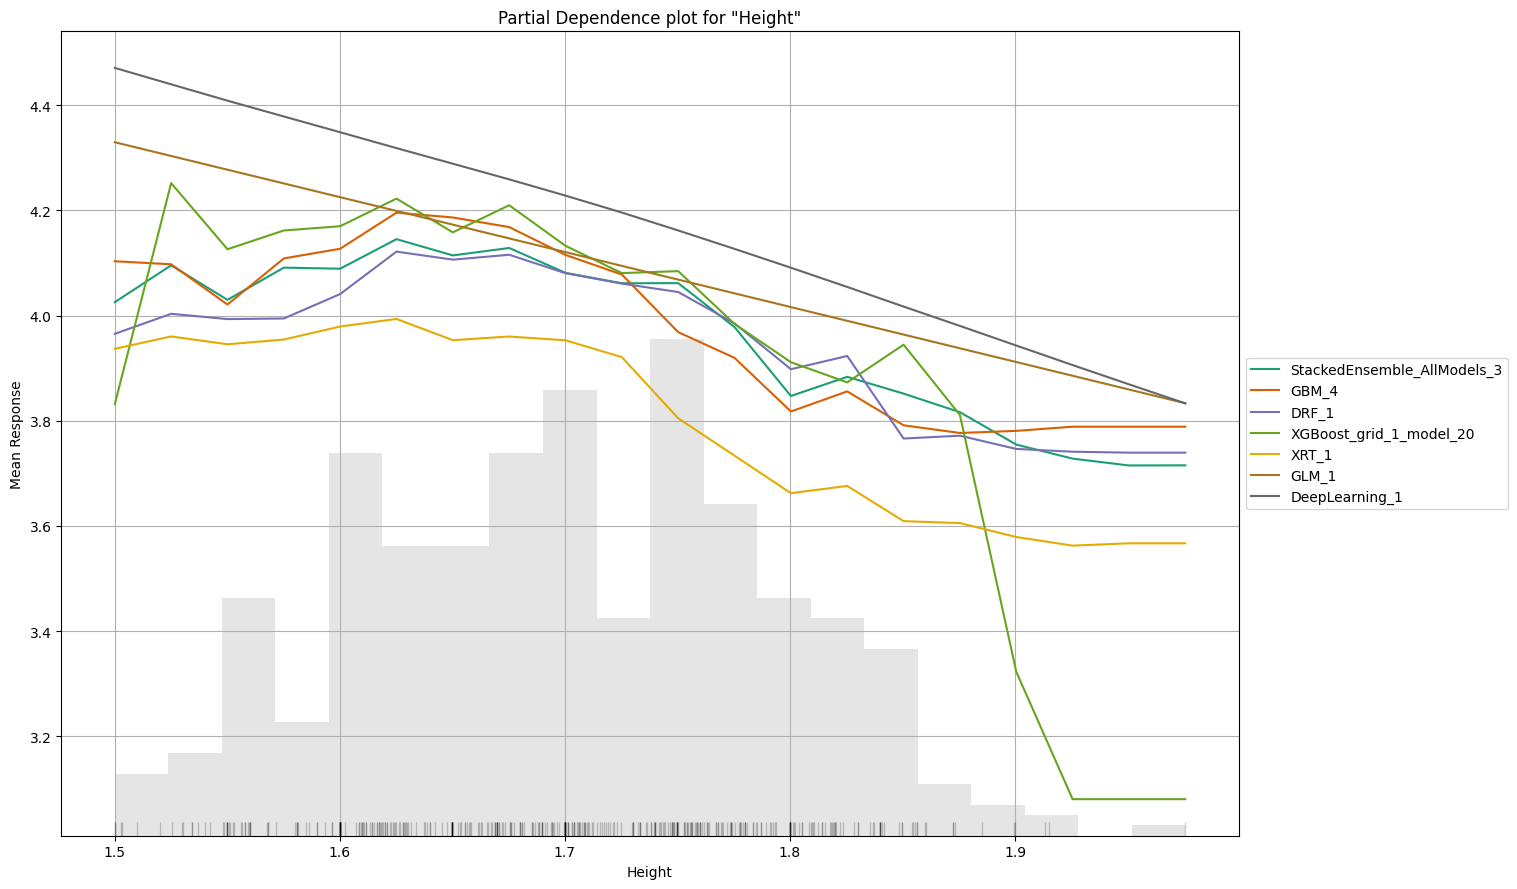

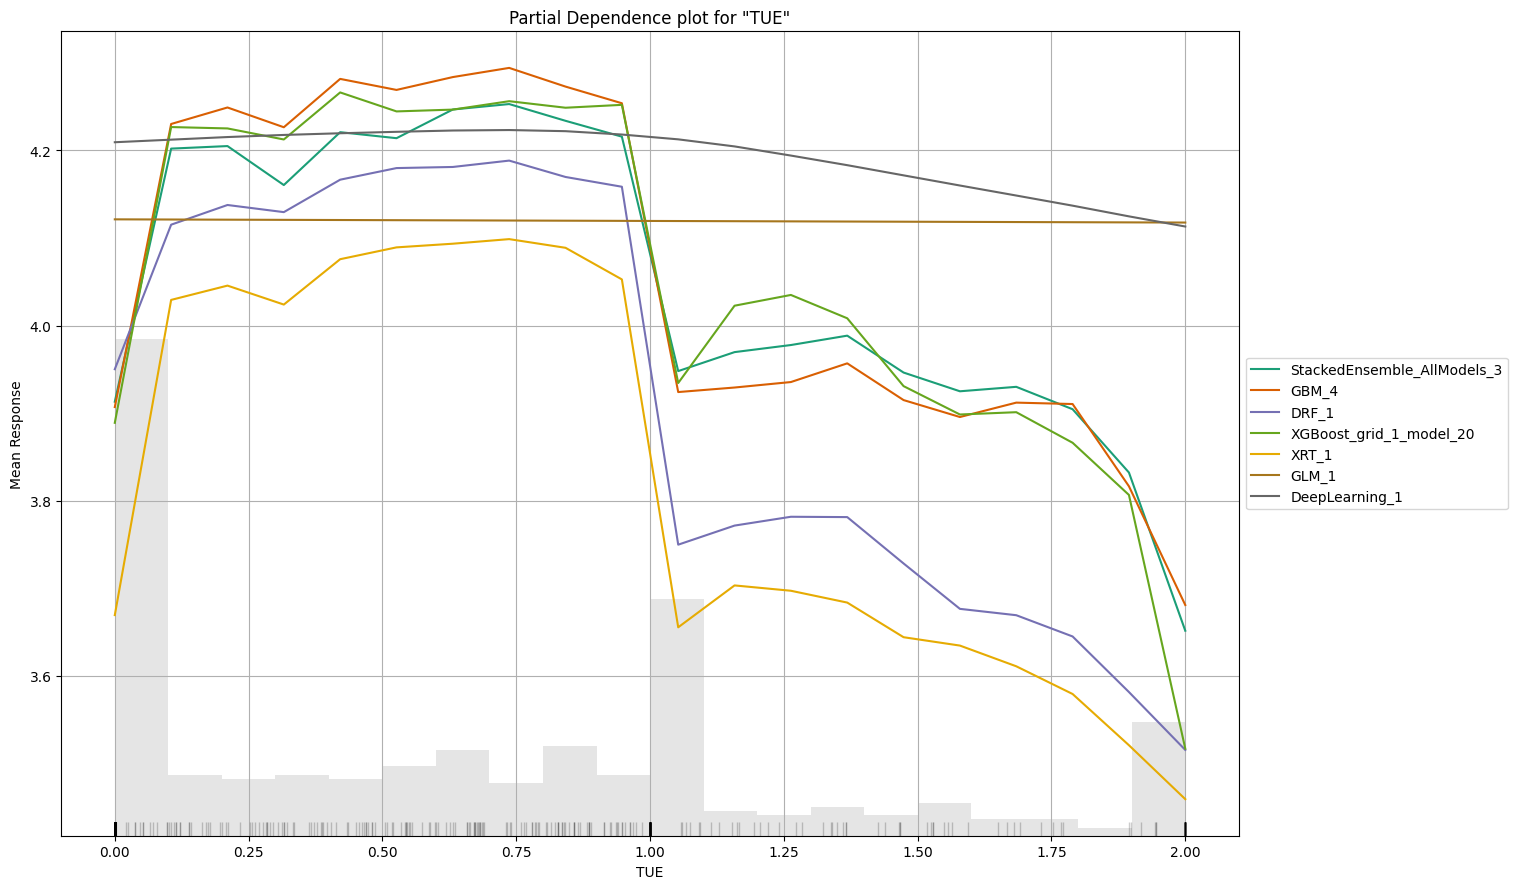

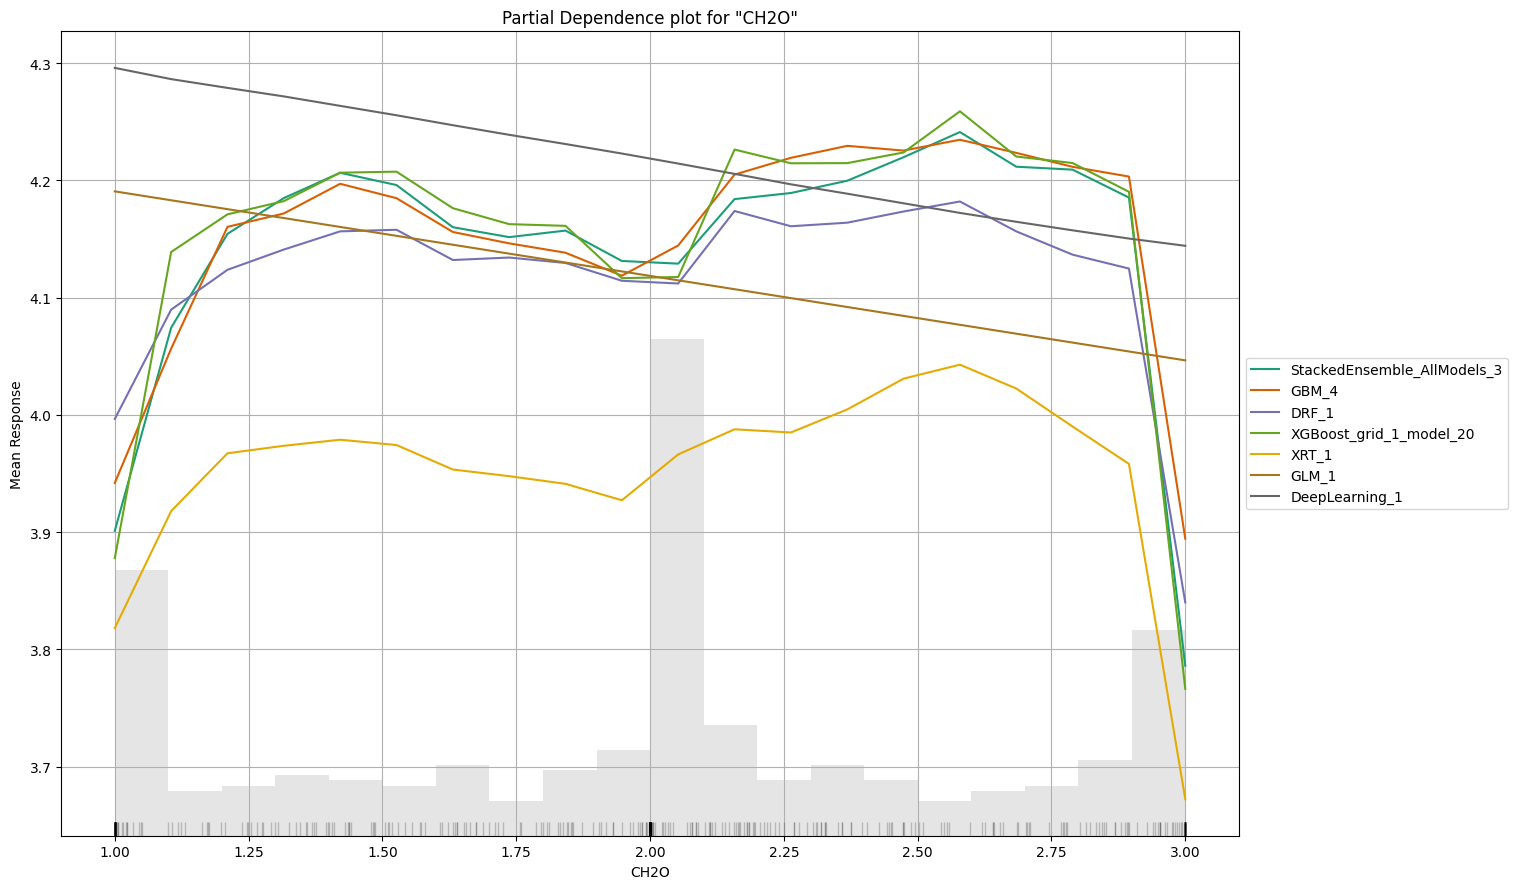

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

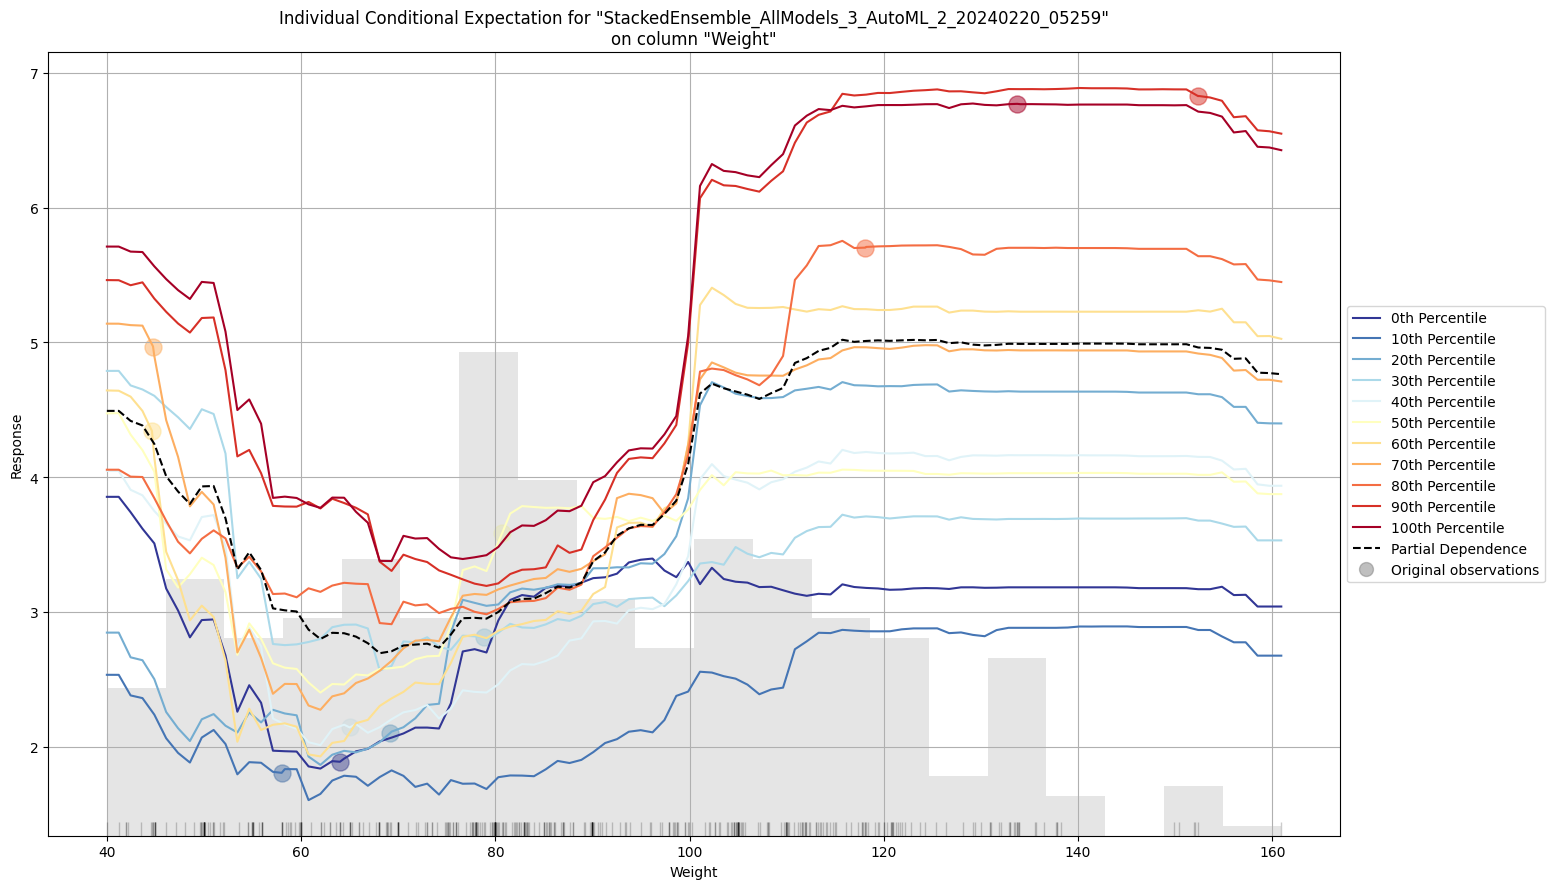

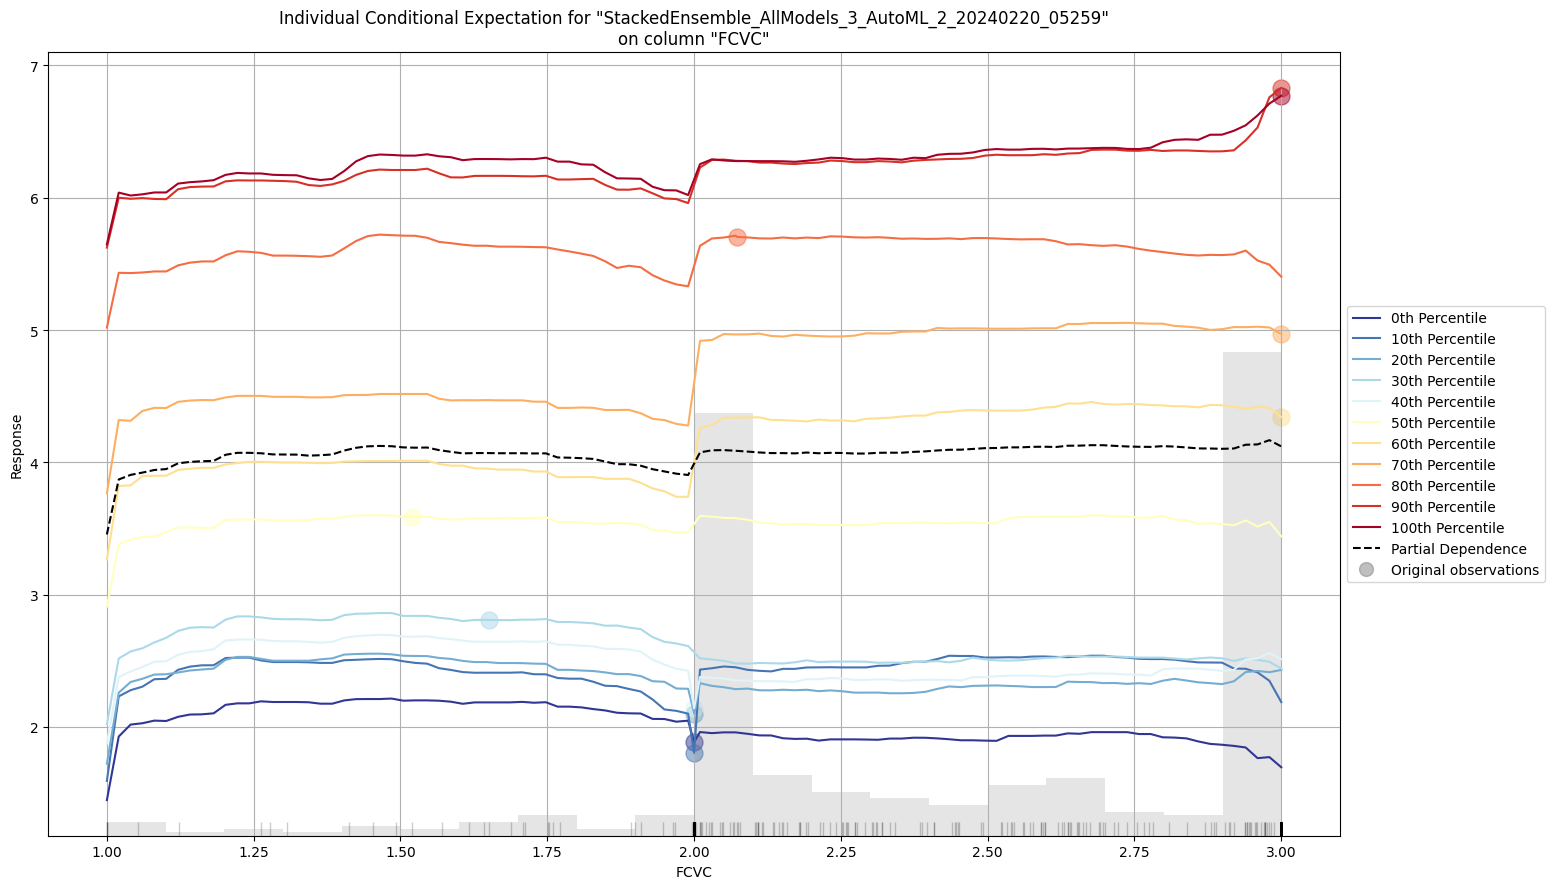

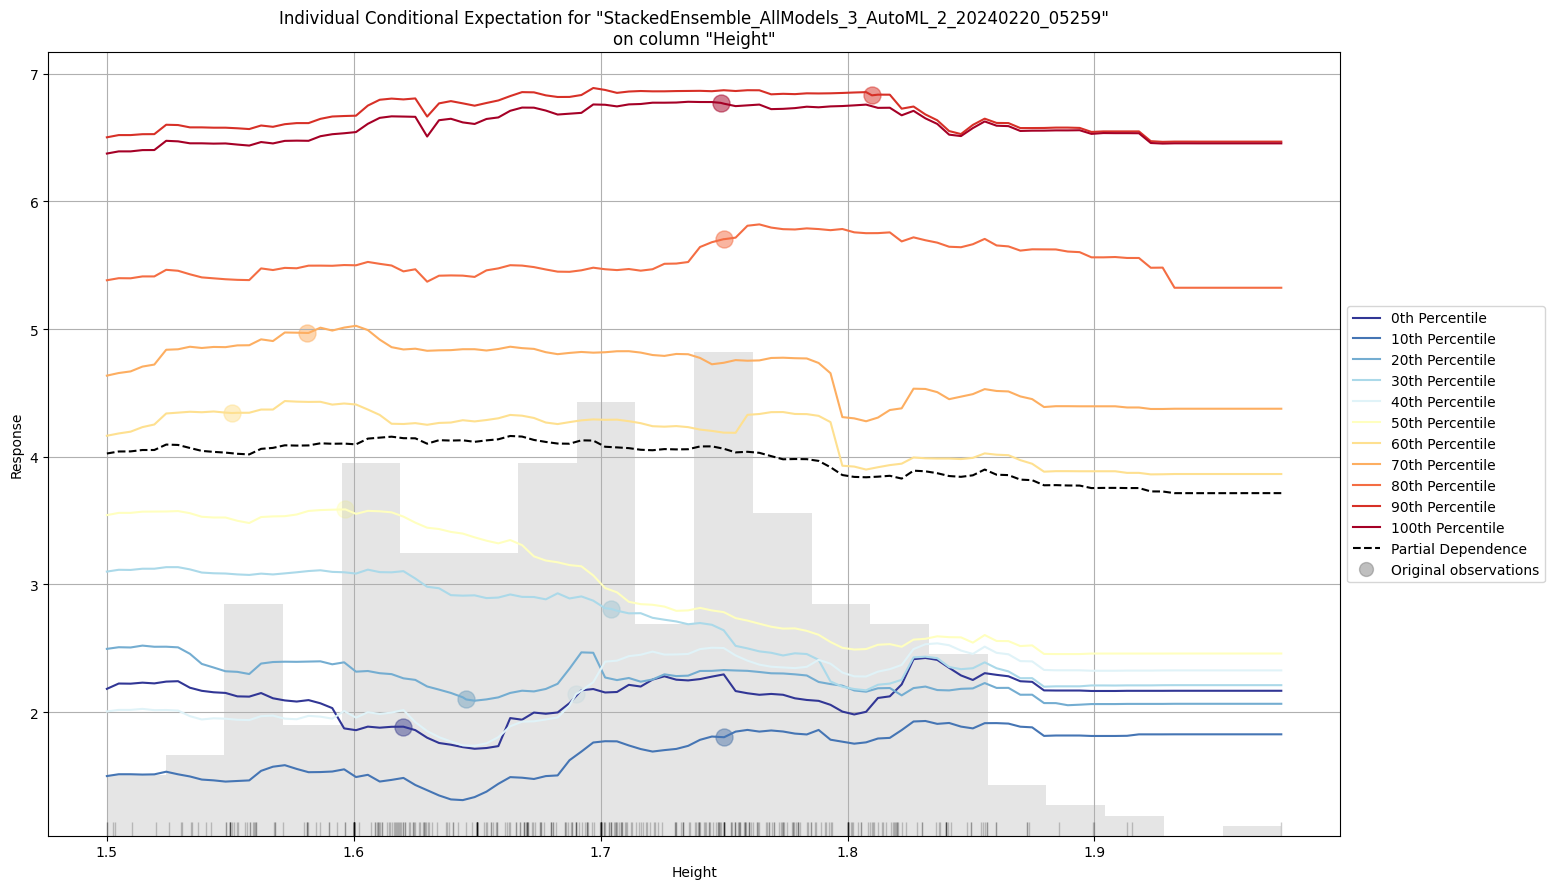

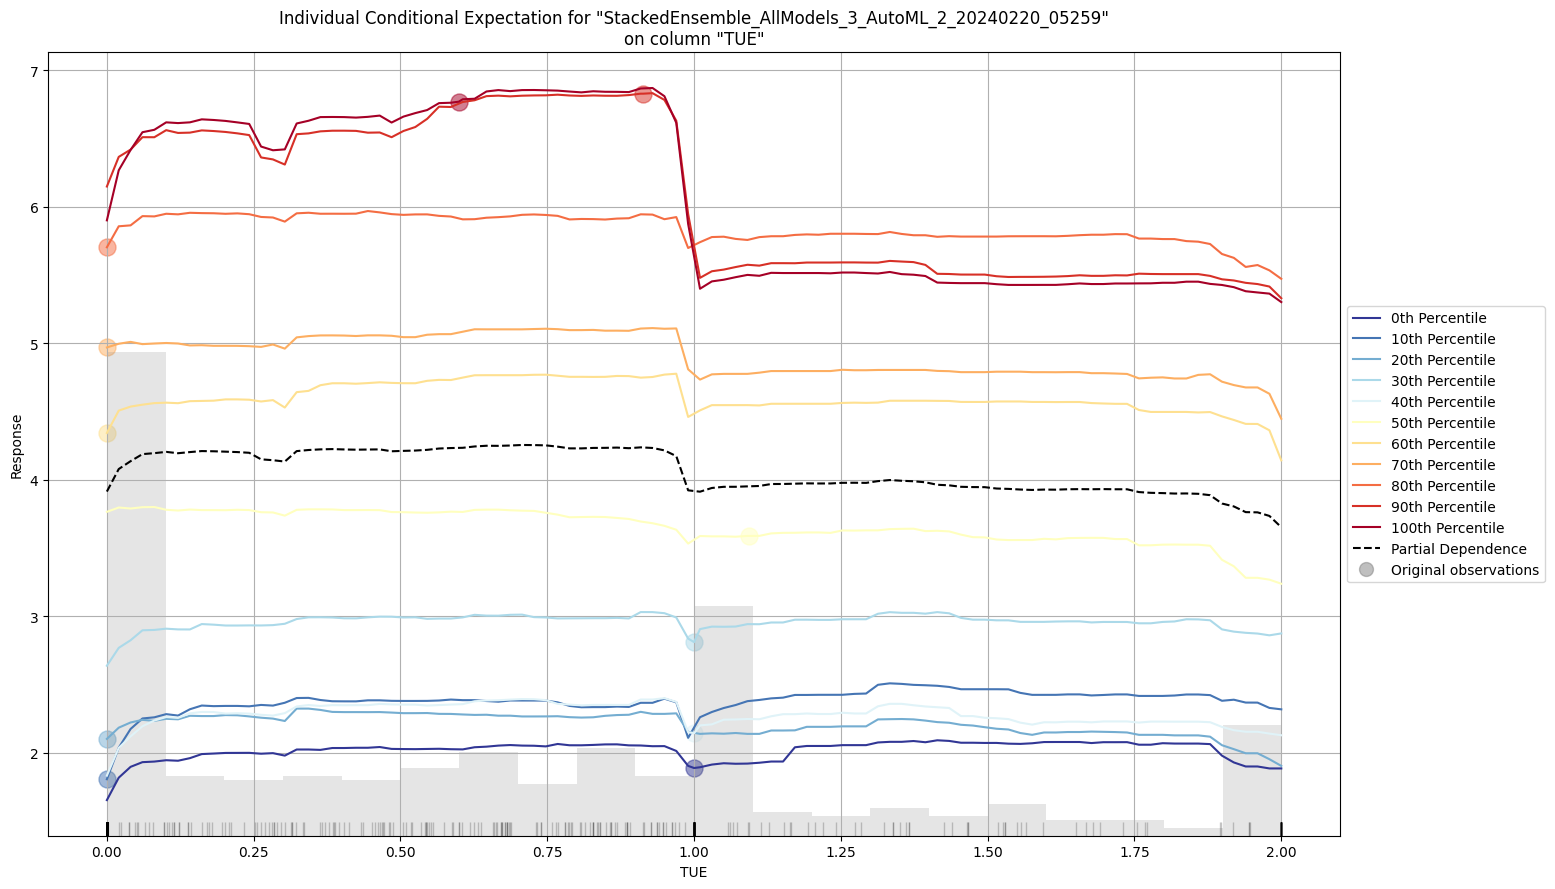

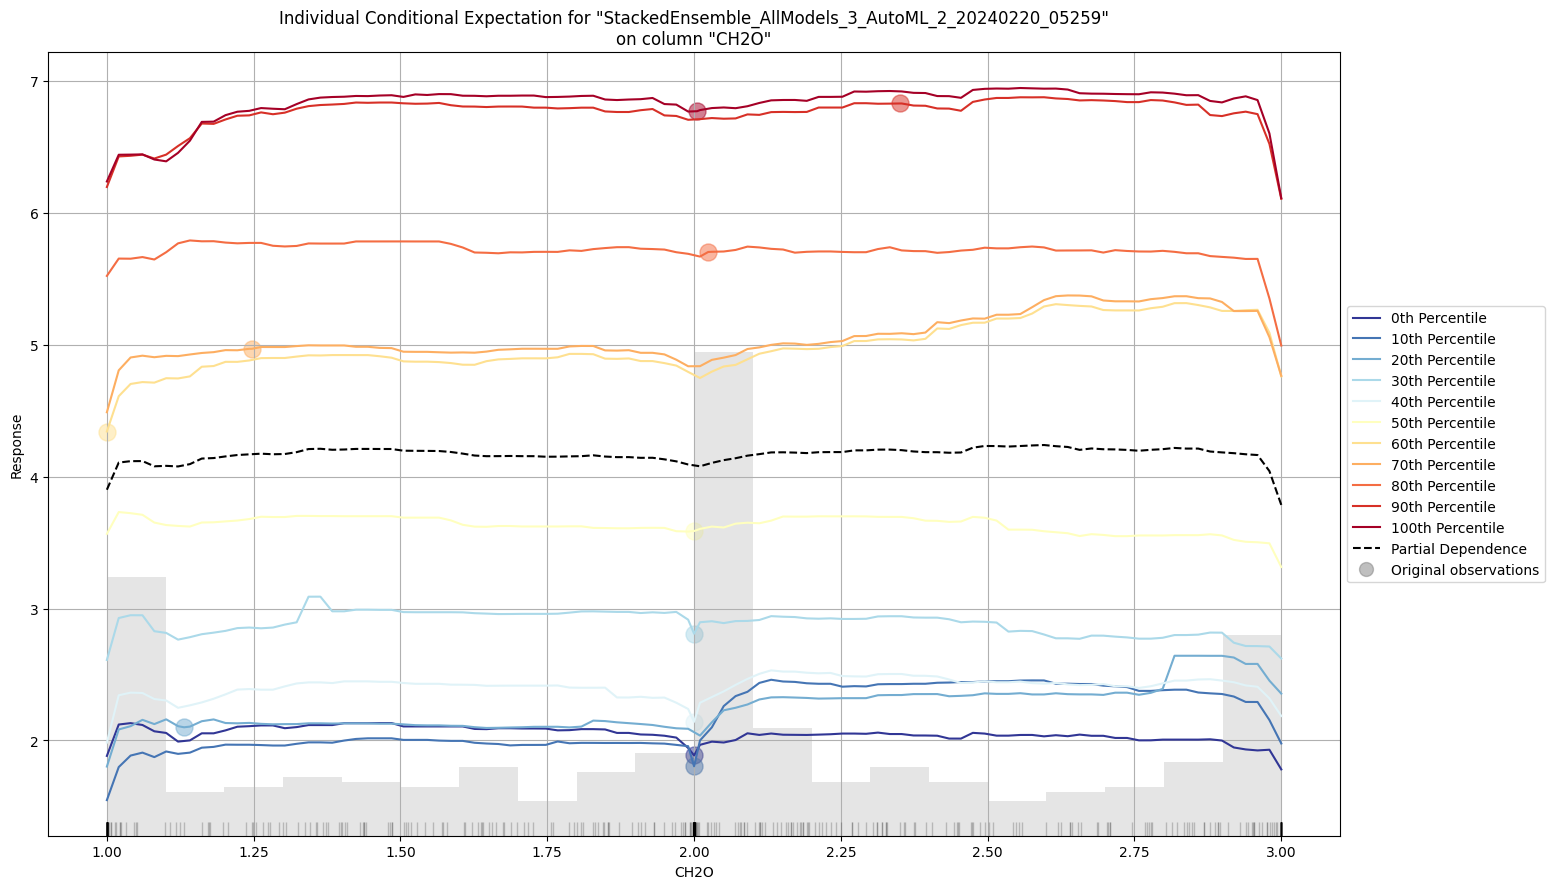

In [ ]:
exa = aml1.explain(hdf_test)

# Hyperparameter Tuning
To find best set a hyperparameter and combinations of interacting hyperparameters for a given dataset hyperparameters tuning is used. It objectively searches different values for model hyperparameters and chooses a subset that results in a model that achieves the best performance on a given dataset.

In [ ]:
s = clean_df['NObeyesdad']

t = clean_df.drop(['NObeyesdad'], axis = 1)

In [ ]:

import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV

In [ ]:


t_train, t_test, s_train, s_test = train_test_split (t, s, random_state = 101, test_size = 0.2)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import RandomForestRegressor

mode = RandomForestRegressor()

param_vals = {'max_depth': [200, 500, 800, 1100], 'n_estimators': [100,200, 300, 400], 'min_samples_split' : [2,3,5]

}

random_rf = RandomizedSearchCV(estimator=mode, param_distributions=param_vals,

n_iter=10, scoring='accuracy', cv=5,

refit=True, n_jobs=-1)

#Training and prediction



random_rf.fit(t_train, s_train)

preds = random_rf.best_estimator_.predict(t_test)

In [ ]:
random_rf.best_params_

{'n_estimators': 400, 'min_samples_split': 5, 'max_depth': 1100}

# Conclusion
H20.ai framework was used to train and test the variables of the dataset of Obesity Estimation Data. This gave the best model as ‘gbm’ and accuracy for test data was 89.9%. From the results shown it can be concluded that the proposed  model can effectively analyze and predict the level of obesity to some extent. Admittedly, the prediction accuracy is still limited at specific points, and the model still needs to be improved in further research. In further research into the corresponding models, different techniques like removing outliers and using ensemble or booster can help achieve better prediction.

# Assignment Question/Answers
***Q1) Is the relationship significant?***

A relationship is said to be statistically significant when the p value for the variables is less than 0.05. P value is probability of obtaining a result at least as extreme as the current one, assuming null hypothesis is true.
Gender: Negative coefficient, statistically significant, suggesting females tend to have lower NObeyesdad values (interpret the meaning in your specific context).
FAVC, SMOKE, SCC, family_history_with_overweight: All negative and significant, suggesting lower values tend to be associated with lower NObeyesdad.
CALC categories: Mixed bag of significant and non-significant effects, indicating different relationships depending on the specific category.
MTRANS categories: Similar to CALC, with diverse significance and directions of effects.
Hence for the chosen dataset it can be concluded that the relationship is significant.

***Q2) Are any model assumptions violated?***

Assumptions for linear regression are:

Linear relationship- The graph for dependent and independent variable needs to be linear by keeping other variables constant. When target variable is plotted against all other independent variables, linear relation is observed for few of them. Hence this assumption is not violated.
Homoscedasticity which means normality of the error distribution - The plot for residuals should be normally distributed i.e., it should form a bell-curve shape. For this model the same is achieved.
No or little multicollinearity-This can be determined by correlation matrix. For this model some of the assumptions are violated. Multicollinearity exists between variables CALC and MTRANS
No autocorrelation can be determined with Durbin-Watson test. Values between 1.5 to 2.5 signifies no autocorrelation. For this model the value is 0.697 ~ 0.7, therefore this assumption is not violated.

***Q3) Is there any multicollinearity in the model? ***

When one independent variable is related to another independent variable that is its highly correlated then multicollinearity exists in the model. It’s an issue as it undermines the statistical significance of an independent variable. Multicollinearity can be determined by computing correlation matrix or calculating VIF value of all variables. In correlation matrix a coefficient closer to +1 or -1 tells us that those two variables are highly correlated. For VIF values a value above 10 tells us that multicollinearity exists. In this model some variables had VIF value greater than 10 and p value was greater than 0.05. Since every column has a VIF value > 1, all columns are highly correlated.

***Q4) In the multivariate models are predictor variables independent of all the other predictor variables?***

 Variables are said to be independent when there is no relation between them. To check this relation, correlation matrix can be used, or it can be observed from graphs too whether there is any pattern followed or not. When correlation matrix is computed for the model, it can be observed that height and weight are correlated to each other. Other than those other predictors are independent from each other.

***Q5)In the multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.***

 From the variable importance plot, the most to least important variables are displayed. For my model weight, FCVC, Height and TUE are top 4 most important variables to determine Obesity.

***Q6) Does the model make sense?***

For a model to make sense it should follow all the assumptions and have p value, VIF between their respective ranges. RMSE should be as low as possible considering the minimum and maximum values of the target variable. So overall the model makes sense. To increase the accuracy, some additional variables can be dropped depending on their importance. Furthermore, outliers can be removed or boosting, or ensemble model can be used.

***Q7)Does regularization help?***

No, RMSE for ridge regression is 1.4, for best model it is 1.

***Q8) Which independent variables are significant?***

 Variables are significant when p-value is less than 0.05. For this model except for CALC_Always
CALC_Frequently
CALC_Sometimes

CALC_no

MTRANS_Automobile

MTRANS_Bike

MTRANS_Motorbike

MTRANS_Public_Transportation

MTRANS_Walking

CAEC
Ageall other variables have p-value less than 0.05. So, it can be said that all variables are significant.

***Q9) Which hyperparameters are important?***

To find best set a hyperparameter and combinations of interacting hyperparameters for a given dataset hyperparameters tuning is used. It objectively searches different values for model hyperparameters and chooses a subset that results in a model that achieves the best performance on a given dataset. For this model tuning is performed using RandomForestRegressor. The best hyperparameters for this model are:-

{'n_estimators': 400, 'min_samples_split': 5, 'max_depth': 1100}

# LICENSE AND REFERENCE

MIT License

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

REFERENCES:

https://rstudio-pubs-static.s3.amazonaws.com/64286_2635bf8b05fb4423ac2968243211b46b.html
https://docs.h2o.ai/h2o/latest-stable/h2o-docs/grid-search.html
https://towardsdatascience.com/a-deep-dive-into-h2os-automl-4b1fe51d3f3e
https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/CC_Kaggle_AutoML_Regression_Melbourne_Housing.ipynb
https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/AutoML_Wine_Quality.ipynb